# Importing dependencies

In [2]:
%matplotlib inline

import math, time, random, datetime

# Statistics
from scipy.stats import zscore

# ML
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use("seaborn-v0_8-whitegrid")


# Loading data

In [3]:
train = pd.read_csv('titanic_train_dataset.csv')
test = pd.read_csv('titanic_test_dataset.csv')
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<Axes: >

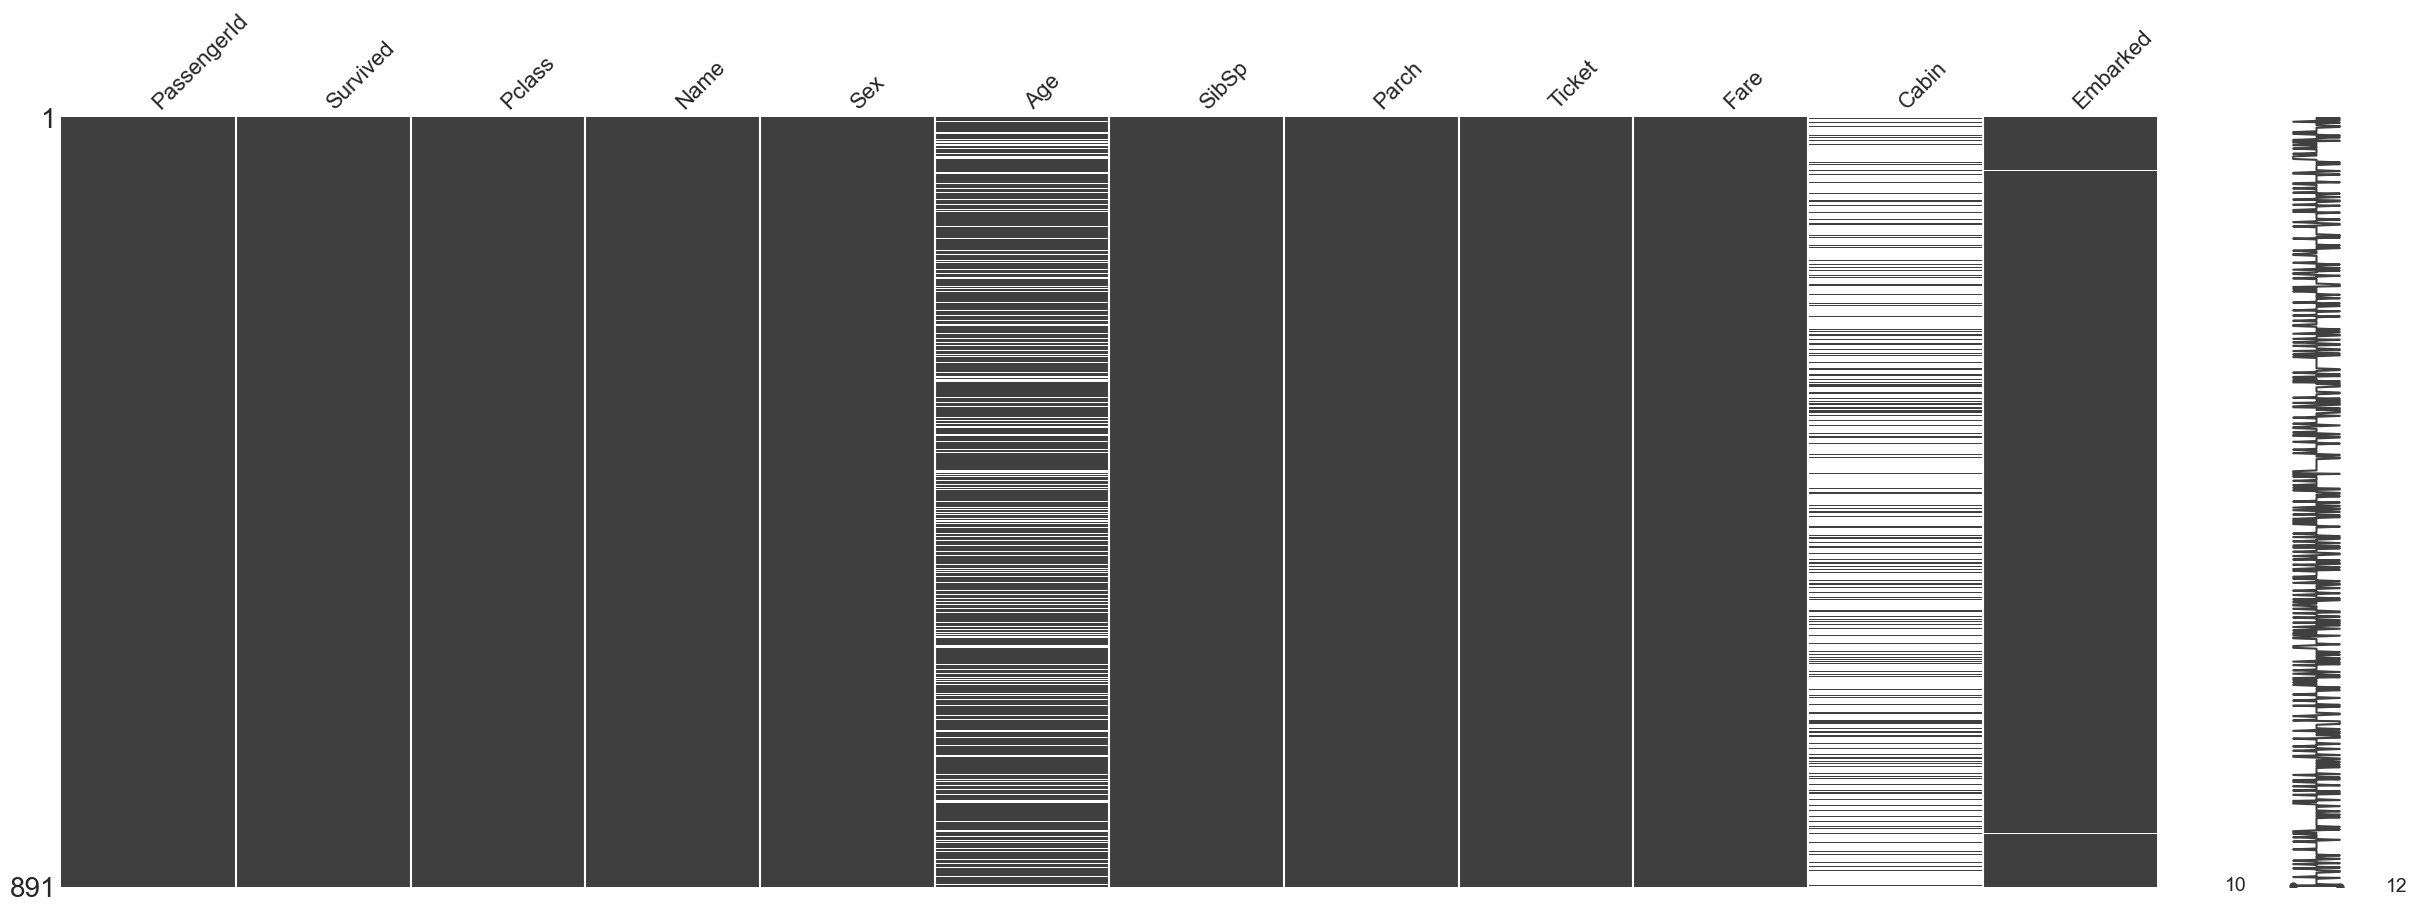

In [4]:
# Missing values
missingno.matrix(train, figsize = (30,10))

In [5]:
# Data types
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Feature Cleaning, Engineering, and Imputation

## Feature: Survided
Description: Whether the passenger survived or not.

Key: 0 = did not survive, 1 = survived

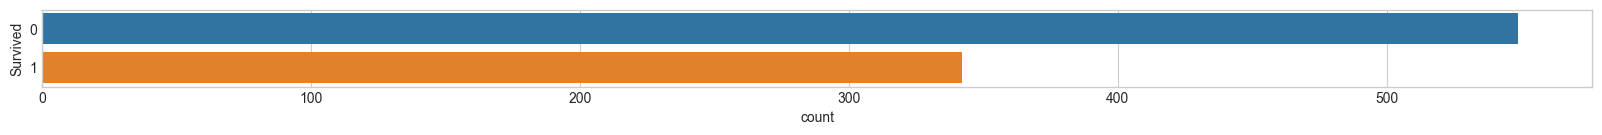

In [6]:
# How many people survived?
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=train);

## Feature: Pclass
Description: The ticket class of the passenger.

Key: 1 = 1st, 2 = 2nd, 3 = 3rd

/var/folders/5f/6kcdp66n19xctf_5nrvff49h0000gn/T/ipykernel_29620/569595461.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.Pclass)


<Axes: xlabel='Pclass', ylabel='Density'>

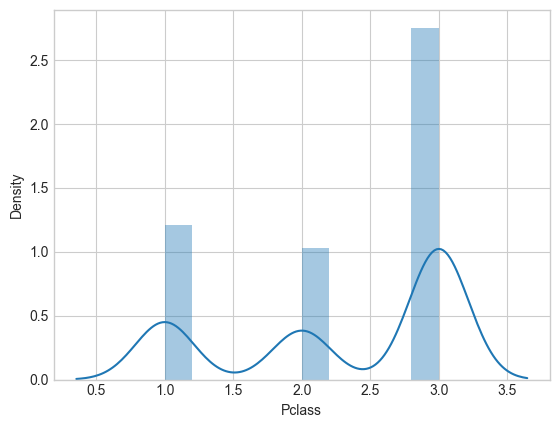

In [7]:
sns.distplot(train.Pclass)

In [8]:
# Are there any missing values in the Pclass column?
train.Pclass.isnull().sum()

0

## Feature: Name
Description: The name of the passenger.

To keep this EDA fast, we won't move forward using the name variable.

## Feature: Sex
    
Description: The sex of the passenger (male or female).

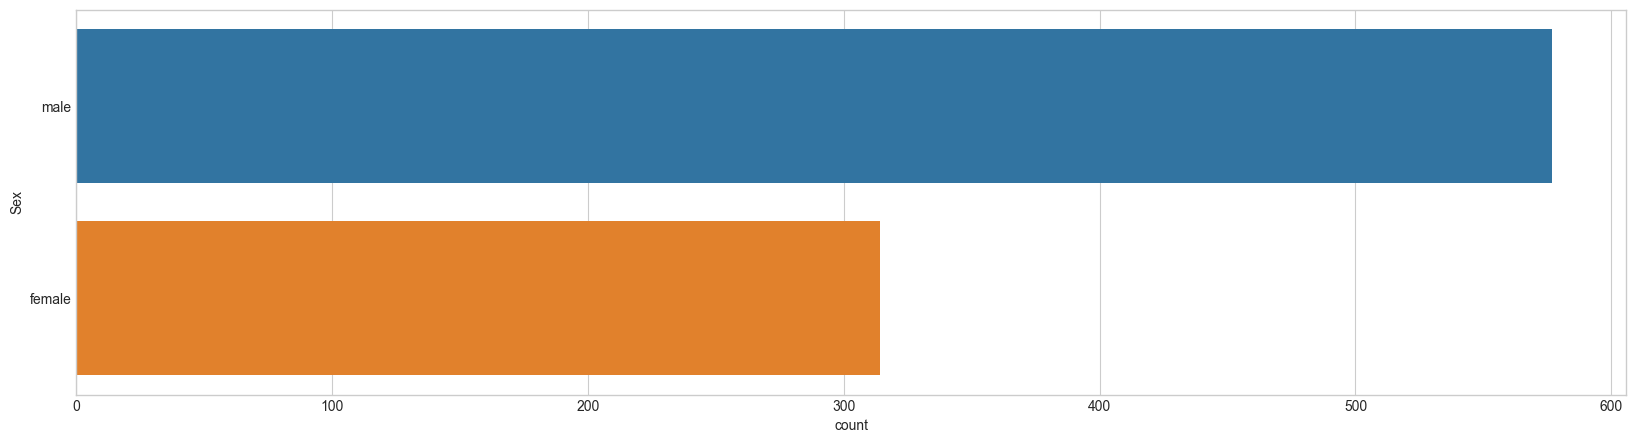

In [9]:
# Let's view the distribution of Sex
plt.figure(figsize=(20, 5))
sns.countplot(y="Sex", data=train);

In [10]:
# Are there any missing values in the Pclass column?
train.Sex.isnull().sum()

0

/var/folders/5f/6kcdp66n19xctf_5nrvff49h0000gn/T/ipykernel_29620/2054352632.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sex_df['Sex'] = np.where(sex_df['Sex'] == 'female', 1, 0)
/var/folders/5f/6kcdp66n19xctf_5nrvff49h0000gn/T/ipykernel_29620/2054352632.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sex_df.loc[sex_df['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'})
/var/folders/5f

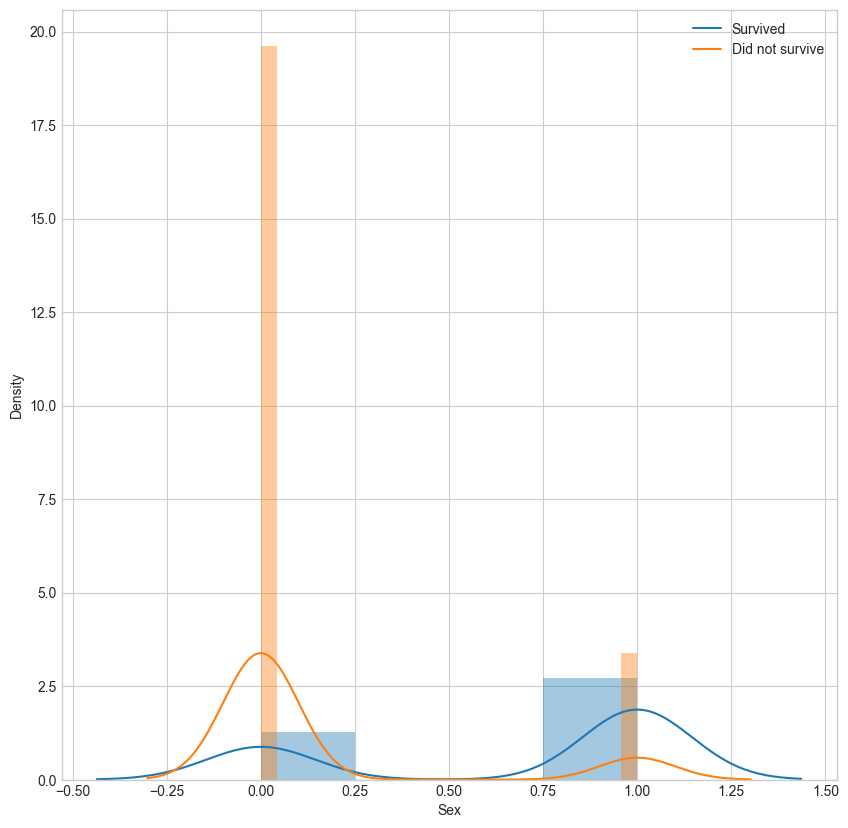

In [11]:
# How does the Sex variable look compared to Survival?
# We can see this because they're both binarys.
fig = plt.figure(figsize=(10, 10))
sex_df = train[['Survived', 'Sex']]
sex_df['Sex'] = np.where(sex_df['Sex'] == 'female', 1, 0)

sns.distplot(sex_df.loc[sex_df['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'})
sns.distplot(sex_df.loc[sex_df['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'})
plt.legend()

## Feature: Age
Description: The age of the passenger.

In [12]:
# How many missing values does age have?
train.Age.isnull().sum()

177

## Feature: SibSp
Description: The number of siblings/spouses the passenger has aboard the Titanic.

In [13]:
# How many missing values does SibSp have?
train.SibSp.isnull().sum()

0

/var/folders/5f/6kcdp66n19xctf_5nrvff49h0000gn/T/ipykernel_29620/1720289829.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sibsp_df.loc[sex_df['Survived'] == 1]['SibSp'], kde_kws={'label': 'Survived'})
/var/folders/5f/6kcdp66n19xctf_5nrvff49h0000gn/T/ipykernel_29620/1720289829.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2

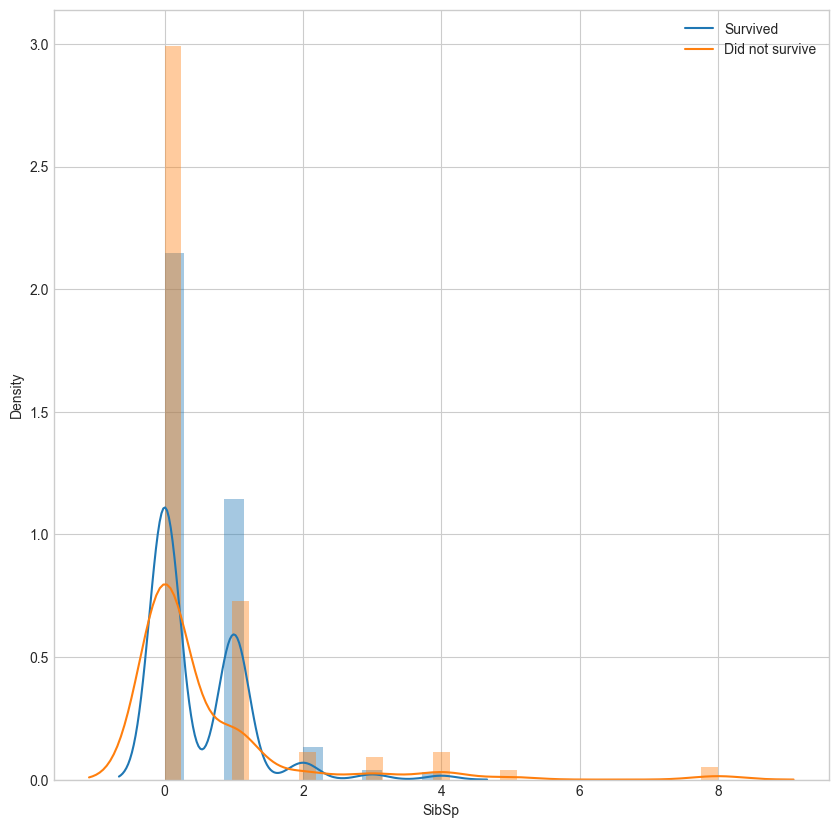

In [14]:
# How does the SibSp variable look compared to Survival?
# We can see this because they're both binarys.
fig = plt.figure(figsize=(10, 10))
sibsp_df = train[['Survived', 'SibSp']]

sns.distplot(sibsp_df.loc[sex_df['Survived'] == 1]['SibSp'], kde_kws={'label': 'Survived'})
sns.distplot(sibsp_df.loc[sex_df['Survived'] == 0]['SibSp'], kde_kws={'label': 'Did not survive'})
plt.legend()

## Feature: Parch
Description: The number of parents/children the passenger has aboard the Titanic.

In [15]:
# How many missing values does SibSp have?
train.Parch.isnull().sum()

0

/var/folders/5f/6kcdp66n19xctf_5nrvff49h0000gn/T/ipykernel_29620/2119893723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(parch_df.loc[parch_df['Survived'] == 1]['Parch'], kde_kws={'label': 'Survived'})
/var/folders/5f/6kcdp66n19xctf_5nrvff49h0000gn/T/ipykernel_29620/2119893723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147e

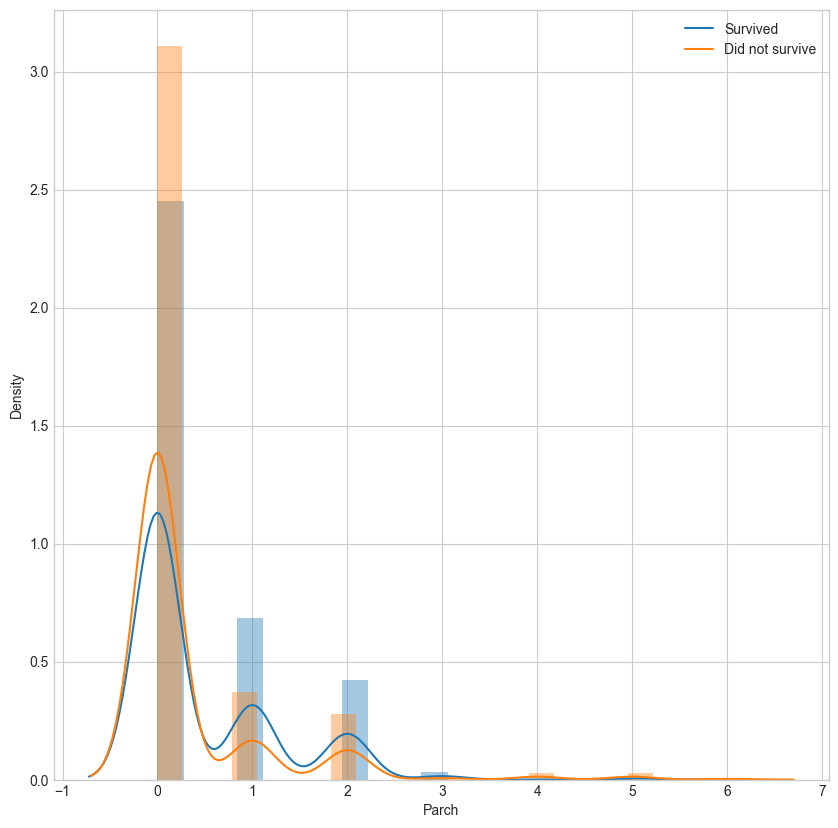

In [16]:
# How does the Parch variable look compared to Survival?
# We can see this because they're both binarys.
fig = plt.figure(figsize=(10, 10))
parch_df = train[['Survived', 'Parch']]

sns.distplot(parch_df.loc[parch_df['Survived'] == 1]['Parch'], kde_kws={'label': 'Survived'})
sns.distplot(parch_df.loc[parch_df['Survived'] == 0]['Parch'], kde_kws={'label': 'Did not survive'})
plt.legend()

## Feature: Ticket
Description: The ticket number of the boarding passenger.

In [17]:
# How many missing values does Ticket have?
train.Ticket.isnull().sum()

0

In [18]:
# How many unique kinds of Ticket are there?
print("There are {} unique Ticket values.".format(len(train.Ticket.unique())))

There are 681 unique Ticket values.


681 unique values is too many for now. So we won't use Ticket in our subset dataframes.

## Feature: Fare
Description: How much the ticket cost.

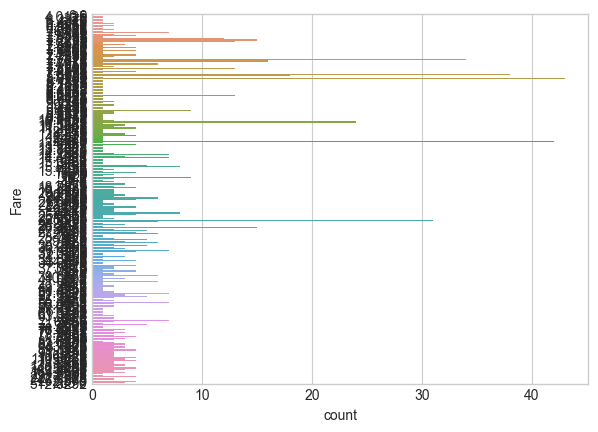

In [19]:
# How many different values of Fare are there?
sns.countplot(y="Fare", data=train);

## Feature: Cabin
Description: The cabin number where the passenger was staying.

In [20]:
# How many missing values does Cabin have?
train.Cabin.isnull().sum()

687

Since there are too many missing values, we won't use Cabin.

## Feature: Embarked
Description: The port where the passenger boarded the Titanic.

Key: C = Cherbourg, Q = Queenstown, S = Southampton

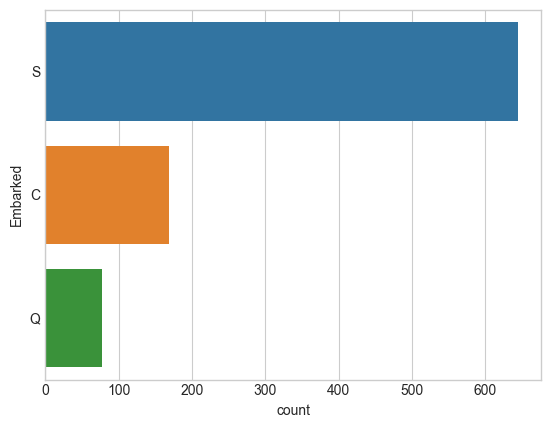

In [21]:
# What do the counts look like?
sns.countplot(y='Embarked', data=train);

## Heatmap or pairplot

In [22]:
age_fare = train[["Age", "Fare"]]

<Axes: >

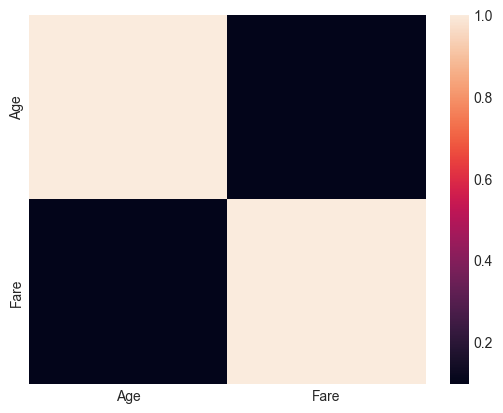

In [23]:
sns.heatmap(data=age_fare.corr()) 

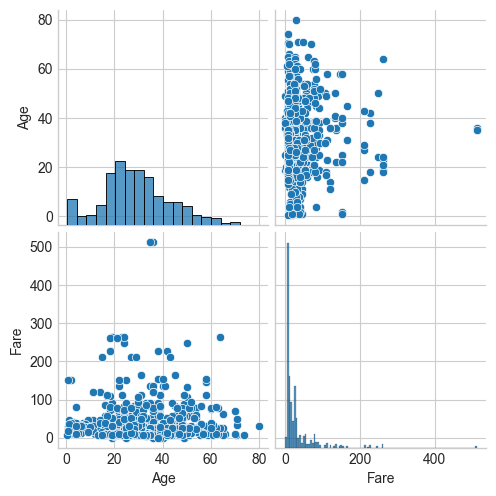

In [24]:
sns.pairplot(age_fare)

# Preparing the data

## Setup

In [53]:
df_bin = pd.DataFrame()
df_con = pd.DataFrame()

df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1, 0) # change sex to 0 for male and 1 for female
df_con['Sex'] = train['Sex']

df_con['Fare'] = train['Fare'] 
df_bin['Fare'] = pd.cut(train['Fare'], bins=5)

df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

df_con = df_con.dropna(subset=['Embarked'])
df_bin = df_bin.dropna(subset=['Embarked'])

,Survived,SibSp,Pclass,Parch,Sex,Fare,Embarked
0,0,1,3,0,male,7.2500,S
1,1,1,1,0,female,71.2833,C
2,1,0,3,0,female,7.9250,S
3,1,1,1,0,female,53.1000,S
4,0,0,3,0,male,8.0500,S
...,...,...,...,...,...,...,...
886,0,0,2,0,male,13.0000,S
887,1,0,1,0,female,30.0000,S
888,0,1,3,2,female,23.4500,S
889,1,0,1,0,male,30.0000,C


In [26]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [27]:
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp

## Encoding

In [28]:
# One-hot encode binned variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

In [29]:
# One hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_con['Pclass'], 
                                   prefix='pclass')

In [30]:
# Combine the one hot encoded columns with df_con_enc
df_con_enc = pd.concat([df_con, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [31]:
# Let's look at data
df_bin_enc.head(20)

,Survived,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Pclass_1,Pclass_2,...,Sex_0,Sex_1,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
1,1,0,1,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,1,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
3,1,0,1,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
5,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1
7,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
8,1,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
9,1,0,1,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,1,0,0


In [32]:
df_con_enc.head(20)

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1
5,0,0,0,8.4583,0,1,0,0,1,0,0,1
6,0,0,0,51.8625,0,0,1,0,1,1,0,0
7,0,3,1,21.0750,0,0,1,0,1,0,0,1
8,1,0,2,11.1333,0,0,1,1,0,0,0,1
9,1,1,0,30.0708,1,0,0,1,0,0,1,0


## Splitting

In [33]:
# Select the dataframe we want to use first for predictions
selected_df = df_con_enc

In [34]:
# Split the dataframe into data and labels
X_train = selected_df.drop('Survived', axis=1) # data
y_train = selected_df.Survived # labels

## Logistic Regression

In [35]:
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

/Users/harrisonhenri/Documents/projetos/ml/ml-notes/python/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 79.98
Accuracy CV 10-Fold: 79.42
Running Time: 0:00:01.642233


/Users/harrisonhenri/Documents/projetos/ml/ml-notes/python/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/harrisonhenri/Documents/projetos/ml/ml-notes/python/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver op

## K-Nearest Neighbours

In [36]:
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 83.69
Accuracy CV 10-Fold: 76.38
Running Time: 0:00:00.074309


## Gaussian Naive Bayes

In [37]:
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 78.52
Accuracy CV 10-Fold: 77.95
Running Time: 0:00:00.018484


## Linear Support Vector Machines (SVC)

In [38]:
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 78.29
Accuracy CV 10-Fold: 77.28
Running Time: 0:00:00.189463


/Users/harrisonhenri/Documents/projetos/ml/ml-notes/python/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harrisonhenri/Documents/projetos/ml/ml-notes/python/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harrisonhenri/Documents/projetos/ml/ml-notes/python/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harrisonhenri/Documents/projetos/ml/ml-notes/python/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harrisonhenri/Documents/projetos/ml/ml-notes/python/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:124

## Stochastic Gradient Descent

In [39]:
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 61.75
Accuracy CV 10-Fold: 71.88
Running Time: 0:00:00.068743


/Users/harrisonhenri/Documents/projetos/ml/ml-notes/python/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harrisonhenri/Documents/projetos/ml/ml-notes/python/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harrisonhenri/Documents/projetos/ml/ml-notes/python/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harrisonhenri/Documents/projetos/ml/ml-notes/python/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harrisonhenri/Documents/projetos/ml/ml-notes/python/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:124

## Decision Tree Classifier

In [40]:
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 92.46
Accuracy CV 10-Fold: 80.09
Running Time: 0:00:00.069154


## Gradient Boost Trees

In [41]:
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.61
Accuracy CV 10-Fold: 80.65
Running Time: 0:00:00.317936


## CatBoost Algorithm

In [42]:
# Define the categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != float)[0]

# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(X_train, 
                  y_train,
                  cat_features)

# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009797
0:	learn: 0.6862830	total: 60.6ms	remaining: 1m
1:	learn: 0.6809444	total: 62.2ms	remaining: 31s
2:	learn: 0.6751692	total: 64.1ms	remaining: 21.3s
3:	learn: 0.6689060	total: 66.1ms	remaining: 16.4s
4:	learn: 0.6632144	total: 68ms	remaining: 13.5s
5:	learn: 0.6576488	total: 69.5ms	remaining: 11.5s
6:	learn: 0.6544440	total: 70.6ms	remaining: 10s
7:	learn: 0.6497394	total: 72.3ms	remaining: 8.96s
8:	learn: 0.6451748	total: 74.2ms	remaining: 8.17s
9:	learn: 0.6407185	total: 75.2ms	remaining: 7.44s
10:	learn: 0.6350931	total: 78ms	remaining: 7.01s
11:	learn: 0.6303937	total: 79.9ms	remaining: 6.58s
12:	learn: 0.6258100	total: 82ms	remaining: 6.23s
13:	learn: 0.6212031	total: 84.9ms	remaining: 5.98s
14:	learn: 0.6165848	total: 87.2ms	remaining: 5.72s
15:	learn: 0.6140184	total: 88ms	remaining: 5.41s
16:	learn: 0.6100946	total: 89.2ms	remaining: 5.16s
17:	learn: 0.6054595	total: 92.4ms	remaining: 5.04s
18:	learn: 0.6015129	total: 94.8ms	remaining: 4.9s
19:	lear

234:	learn: 0.4018469	total: 543ms	remaining: 1.77s
235:	learn: 0.4018425	total: 544ms	remaining: 1.76s
236:	learn: 0.4017563	total: 546ms	remaining: 1.76s
237:	learn: 0.4016080	total: 548ms	remaining: 1.75s
238:	learn: 0.4014150	total: 549ms	remaining: 1.75s
239:	learn: 0.4013891	total: 550ms	remaining: 1.74s
240:	learn: 0.4009959	total: 552ms	remaining: 1.74s
241:	learn: 0.4008689	total: 554ms	remaining: 1.74s
242:	learn: 0.4004490	total: 556ms	remaining: 1.73s
243:	learn: 0.4002205	total: 558ms	remaining: 1.73s
244:	learn: 0.4000956	total: 560ms	remaining: 1.72s
245:	learn: 0.3997072	total: 562ms	remaining: 1.72s
246:	learn: 0.3993778	total: 563ms	remaining: 1.72s
247:	learn: 0.3992215	total: 565ms	remaining: 1.71s
248:	learn: 0.3990992	total: 567ms	remaining: 1.71s
249:	learn: 0.3988645	total: 569ms	remaining: 1.71s
250:	learn: 0.3988300	total: 570ms	remaining: 1.7s
251:	learn: 0.3986983	total: 572ms	remaining: 1.7s
252:	learn: 0.3983530	total: 574ms	remaining: 1.69s
253:	learn: 0.

490:	learn: 0.3732818	total: 934ms	remaining: 969ms
491:	learn: 0.3732818	total: 935ms	remaining: 966ms
492:	learn: 0.3732818	total: 936ms	remaining: 963ms
493:	learn: 0.3732593	total: 937ms	remaining: 960ms
494:	learn: 0.3731522	total: 939ms	remaining: 958ms
495:	learn: 0.3731125	total: 940ms	remaining: 955ms
496:	learn: 0.3730970	total: 942ms	remaining: 954ms
497:	learn: 0.3730399	total: 944ms	remaining: 951ms
498:	learn: 0.3730227	total: 945ms	remaining: 948ms
499:	learn: 0.3729047	total: 946ms	remaining: 946ms
500:	learn: 0.3726085	total: 948ms	remaining: 944ms
501:	learn: 0.3724395	total: 949ms	remaining: 942ms
502:	learn: 0.3723637	total: 951ms	remaining: 940ms
503:	learn: 0.3722886	total: 953ms	remaining: 938ms
504:	learn: 0.3722868	total: 954ms	remaining: 935ms
505:	learn: 0.3722349	total: 955ms	remaining: 933ms
506:	learn: 0.3722327	total: 956ms	remaining: 930ms
507:	learn: 0.3721671	total: 963ms	remaining: 933ms
508:	learn: 0.3720283	total: 965ms	remaining: 931ms
509:	learn: 

653:	learn: 0.3629608	total: 1.18s	remaining: 622ms
654:	learn: 0.3628955	total: 1.18s	remaining: 620ms
655:	learn: 0.3628681	total: 1.18s	remaining: 618ms
656:	learn: 0.3628398	total: 1.18s	remaining: 616ms
657:	learn: 0.3627992	total: 1.18s	remaining: 614ms
658:	learn: 0.3626565	total: 1.18s	remaining: 613ms
659:	learn: 0.3625929	total: 1.19s	remaining: 611ms
660:	learn: 0.3624975	total: 1.19s	remaining: 609ms
661:	learn: 0.3624321	total: 1.19s	remaining: 607ms
662:	learn: 0.3624059	total: 1.19s	remaining: 605ms
663:	learn: 0.3623576	total: 1.19s	remaining: 603ms
664:	learn: 0.3623036	total: 1.19s	remaining: 602ms
665:	learn: 0.3622910	total: 1.19s	remaining: 599ms
666:	learn: 0.3621974	total: 1.2s	remaining: 597ms
667:	learn: 0.3621825	total: 1.2s	remaining: 595ms
668:	learn: 0.3621698	total: 1.2s	remaining: 593ms
669:	learn: 0.3621180	total: 1.2s	remaining: 591ms
670:	learn: 0.3619870	total: 1.2s	remaining: 589ms
671:	learn: 0.3619750	total: 1.2s	remaining: 587ms
672:	learn: 0.3618

876:	learn: 0.3482117	total: 1.52s	remaining: 213ms
877:	learn: 0.3479783	total: 1.52s	remaining: 211ms
878:	learn: 0.3478829	total: 1.52s	remaining: 209ms
879:	learn: 0.3478102	total: 1.52s	remaining: 208ms
880:	learn: 0.3476484	total: 1.52s	remaining: 206ms
881:	learn: 0.3476229	total: 1.53s	remaining: 204ms
882:	learn: 0.3475578	total: 1.53s	remaining: 203ms
883:	learn: 0.3475041	total: 1.53s	remaining: 201ms
884:	learn: 0.3474996	total: 1.53s	remaining: 199ms
885:	learn: 0.3474244	total: 1.53s	remaining: 197ms
886:	learn: 0.3473715	total: 1.53s	remaining: 196ms
887:	learn: 0.3473187	total: 1.54s	remaining: 194ms
888:	learn: 0.3472613	total: 1.54s	remaining: 192ms
889:	learn: 0.3471637	total: 1.54s	remaining: 190ms
890:	learn: 0.3471375	total: 1.54s	remaining: 189ms
891:	learn: 0.3471341	total: 1.54s	remaining: 187ms
892:	learn: 0.3469851	total: 1.54s	remaining: 185ms
893:	learn: 0.3469369	total: 1.54s	remaining: 183ms
894:	learn: 0.3469268	total: 1.55s	remaining: 182ms
895:	learn: 

In [43]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/10]
0:	learn: 0.6745162	test: 0.6767086	best: 0.6767086 (0)	total: 3.64ms	remaining: 3.64s
1:	learn: 0.6563735	test: 0.6625619	best: 0.6625619 (1)	total: 7.45ms	remaining: 3.72s
2:	learn: 0.6393665	test: 0.6503586	best: 0.6503586 (2)	total: 13ms	remaining: 4.3s
3:	learn: 0.6245037	test: 0.6386039	best: 0.6386039 (3)	total: 15.1ms	remaining: 3.77s
4:	learn: 0.6100945	test: 0.6265278	best: 0.6265278 (4)	total: 18.2ms	remaining: 3.63s
5:	learn: 0.5969007	test: 0.6166952	best: 0.6166952 (5)	total: 21ms	remaining: 3.47s
6:	learn: 0.5850695	test: 0.6078388	best: 0.6078388 (6)	total: 24.4ms	remaining: 3.46s
7:	learn: 0.5733859	test: 0.5982216	best: 0.5982216 (7)	total: 26.9ms	remaining: 3.34s
8:	learn: 0.5628595	test: 0.5914378	best: 0.5914378 (8)	total: 29.5ms	remaining: 3.25s
9:	learn: 0.5515334	test: 0.5834997	best: 0.5834997 (9)	total: 32.4ms	remaining: 3.2s
10:	learn: 0.5427606	test: 0.5765989	best: 0.5765989 (10)	total: 34.5ms	remaining: 3.1s
11:	learn: 0.5328784	tes

140:	learn: 0.3718647	test: 0.4916882	best: 0.4882066 (82)	total: 343ms	remaining: 2.09s
141:	learn: 0.3715634	test: 0.4918916	best: 0.4882066 (82)	total: 348ms	remaining: 2.1s
142:	learn: 0.3715469	test: 0.4917779	best: 0.4882066 (82)	total: 352ms	remaining: 2.11s
143:	learn: 0.3709718	test: 0.4913909	best: 0.4882066 (82)	total: 355ms	remaining: 2.11s
144:	learn: 0.3703208	test: 0.4915015	best: 0.4882066 (82)	total: 358ms	remaining: 2.11s
145:	learn: 0.3698773	test: 0.4909373	best: 0.4882066 (82)	total: 361ms	remaining: 2.11s
146:	learn: 0.3692521	test: 0.4905325	best: 0.4882066 (82)	total: 363ms	remaining: 2.11s
147:	learn: 0.3689781	test: 0.4904287	best: 0.4882066 (82)	total: 366ms	remaining: 2.1s
148:	learn: 0.3689569	test: 0.4904674	best: 0.4882066 (82)	total: 367ms	remaining: 2.1s
149:	learn: 0.3685805	test: 0.4906789	best: 0.4882066 (82)	total: 370ms	remaining: 2.09s
150:	learn: 0.3679548	test: 0.4902483	best: 0.4882066 (82)	total: 372ms	remaining: 2.09s
151:	learn: 0.3679548	te

236:	learn: 0.3475539	test: 0.4883897	best: 0.4868267 (215)	total: 581ms	remaining: 1.87s
237:	learn: 0.3474369	test: 0.4887056	best: 0.4868267 (215)	total: 585ms	remaining: 1.87s
238:	learn: 0.3473980	test: 0.4887083	best: 0.4868267 (215)	total: 588ms	remaining: 1.87s
239:	learn: 0.3469607	test: 0.4896530	best: 0.4868267 (215)	total: 593ms	remaining: 1.88s
240:	learn: 0.3467656	test: 0.4895570	best: 0.4868267 (215)	total: 595ms	remaining: 1.88s
241:	learn: 0.3467462	test: 0.4895587	best: 0.4868267 (215)	total: 599ms	remaining: 1.88s
242:	learn: 0.3464414	test: 0.4894297	best: 0.4868267 (215)	total: 604ms	remaining: 1.88s
243:	learn: 0.3462958	test: 0.4892907	best: 0.4868267 (215)	total: 606ms	remaining: 1.88s
244:	learn: 0.3460244	test: 0.4890073	best: 0.4868267 (215)	total: 608ms	remaining: 1.87s
245:	learn: 0.3459878	test: 0.4890098	best: 0.4868267 (215)	total: 610ms	remaining: 1.87s
246:	learn: 0.3458640	test: 0.4891004	best: 0.4868267 (215)	total: 613ms	remaining: 1.87s
247:	learn

361:	learn: 0.3142100	test: 0.4903067	best: 0.4868267 (215)	total: 931ms	remaining: 1.64s
362:	learn: 0.3140613	test: 0.4901887	best: 0.4868267 (215)	total: 935ms	remaining: 1.64s
363:	learn: 0.3138619	test: 0.4902048	best: 0.4868267 (215)	total: 940ms	remaining: 1.64s
364:	learn: 0.3136008	test: 0.4902726	best: 0.4868267 (215)	total: 944ms	remaining: 1.64s
365:	learn: 0.3134212	test: 0.4902063	best: 0.4868267 (215)	total: 946ms	remaining: 1.64s
366:	learn: 0.3133107	test: 0.4903995	best: 0.4868267 (215)	total: 949ms	remaining: 1.64s
367:	learn: 0.3132254	test: 0.4901635	best: 0.4868267 (215)	total: 953ms	remaining: 1.64s
368:	learn: 0.3128104	test: 0.4902710	best: 0.4868267 (215)	total: 956ms	remaining: 1.63s
369:	learn: 0.3121572	test: 0.4904292	best: 0.4868267 (215)	total: 959ms	remaining: 1.63s
370:	learn: 0.3117222	test: 0.4900892	best: 0.4868267 (215)	total: 961ms	remaining: 1.63s
371:	learn: 0.3116065	test: 0.4901523	best: 0.4868267 (215)	total: 963ms	remaining: 1.63s
372:	learn

465:	learn: 0.2939138	test: 0.4889982	best: 0.4865146 (384)	total: 1.33s	remaining: 1.52s
466:	learn: 0.2936847	test: 0.4896587	best: 0.4865146 (384)	total: 1.33s	remaining: 1.52s
467:	learn: 0.2935678	test: 0.4894860	best: 0.4865146 (384)	total: 1.33s	remaining: 1.52s
468:	learn: 0.2933979	test: 0.4896410	best: 0.4865146 (384)	total: 1.34s	remaining: 1.51s
469:	learn: 0.2930511	test: 0.4896705	best: 0.4865146 (384)	total: 1.34s	remaining: 1.51s
470:	learn: 0.2929887	test: 0.4896148	best: 0.4865146 (384)	total: 1.34s	remaining: 1.51s
471:	learn: 0.2928069	test: 0.4896559	best: 0.4865146 (384)	total: 1.35s	remaining: 1.51s
472:	learn: 0.2926058	test: 0.4896124	best: 0.4865146 (384)	total: 1.35s	remaining: 1.51s
473:	learn: 0.2925061	test: 0.4896196	best: 0.4865146 (384)	total: 1.35s	remaining: 1.5s
474:	learn: 0.2924587	test: 0.4896286	best: 0.4865146 (384)	total: 1.36s	remaining: 1.5s
475:	learn: 0.2924523	test: 0.4895739	best: 0.4865146 (384)	total: 1.36s	remaining: 1.5s
476:	learn: 0

563:	learn: 0.2755135	test: 0.4884606	best: 0.4865146 (384)	total: 1.73s	remaining: 1.33s
564:	learn: 0.2754105	test: 0.4885267	best: 0.4865146 (384)	total: 1.73s	remaining: 1.33s
565:	learn: 0.2753474	test: 0.4885005	best: 0.4865146 (384)	total: 1.74s	remaining: 1.33s
566:	learn: 0.2750483	test: 0.4895029	best: 0.4865146 (384)	total: 1.74s	remaining: 1.33s
567:	learn: 0.2748810	test: 0.4895666	best: 0.4865146 (384)	total: 1.75s	remaining: 1.33s
568:	learn: 0.2748200	test: 0.4893026	best: 0.4865146 (384)	total: 1.75s	remaining: 1.33s
569:	learn: 0.2747080	test: 0.4893799	best: 0.4865146 (384)	total: 1.76s	remaining: 1.33s
570:	learn: 0.2747017	test: 0.4893304	best: 0.4865146 (384)	total: 1.76s	remaining: 1.32s
571:	learn: 0.2745991	test: 0.4893741	best: 0.4865146 (384)	total: 1.77s	remaining: 1.32s
572:	learn: 0.2745774	test: 0.4895563	best: 0.4865146 (384)	total: 1.77s	remaining: 1.32s
573:	learn: 0.2745738	test: 0.4895586	best: 0.4865146 (384)	total: 1.77s	remaining: 1.32s
574:	learn

663:	learn: 0.2584874	test: 0.4859084	best: 0.4854566 (648)	total: 2.11s	remaining: 1.07s
664:	learn: 0.2581747	test: 0.4855883	best: 0.4854566 (648)	total: 2.11s	remaining: 1.06s
665:	learn: 0.2581426	test: 0.4856159	best: 0.4854566 (648)	total: 2.11s	remaining: 1.06s
666:	learn: 0.2579937	test: 0.4854227	best: 0.4854227 (666)	total: 2.12s	remaining: 1.06s
667:	learn: 0.2577787	test: 0.4848636	best: 0.4848636 (667)	total: 2.12s	remaining: 1.05s
668:	learn: 0.2577784	test: 0.4848621	best: 0.4848621 (668)	total: 2.13s	remaining: 1.05s
669:	learn: 0.2576914	test: 0.4848369	best: 0.4848369 (669)	total: 2.13s	remaining: 1.05s
670:	learn: 0.2574902	test: 0.4850013	best: 0.4848369 (669)	total: 2.14s	remaining: 1.05s
671:	learn: 0.2572991	test: 0.4846196	best: 0.4846196 (671)	total: 2.14s	remaining: 1.04s
672:	learn: 0.2570497	test: 0.4846168	best: 0.4846168 (672)	total: 2.14s	remaining: 1.04s
673:	learn: 0.2570455	test: 0.4845598	best: 0.4845598 (673)	total: 2.15s	remaining: 1.04s
674:	learn

781:	learn: 0.2417909	test: 0.4803504	best: 0.4789438 (770)	total: 2.5s	remaining: 698ms
782:	learn: 0.2417232	test: 0.4802272	best: 0.4789438 (770)	total: 2.51s	remaining: 695ms
783:	learn: 0.2416498	test: 0.4801653	best: 0.4789438 (770)	total: 2.51s	remaining: 691ms
784:	learn: 0.2416382	test: 0.4801307	best: 0.4789438 (770)	total: 2.51s	remaining: 688ms
785:	learn: 0.2414735	test: 0.4798022	best: 0.4789438 (770)	total: 2.51s	remaining: 685ms
786:	learn: 0.2413956	test: 0.4798179	best: 0.4789438 (770)	total: 2.52s	remaining: 682ms
787:	learn: 0.2413377	test: 0.4799029	best: 0.4789438 (770)	total: 2.52s	remaining: 679ms
788:	learn: 0.2412374	test: 0.4797707	best: 0.4789438 (770)	total: 2.53s	remaining: 676ms
789:	learn: 0.2410833	test: 0.4799727	best: 0.4789438 (770)	total: 2.53s	remaining: 673ms
790:	learn: 0.2409490	test: 0.4800146	best: 0.4789438 (770)	total: 2.53s	remaining: 669ms
791:	learn: 0.2408163	test: 0.4800714	best: 0.4789438 (770)	total: 2.54s	remaining: 666ms
792:	learn:

874:	learn: 0.2310007	test: 0.4787278	best: 0.4776986 (837)	total: 2.77s	remaining: 395ms
875:	learn: 0.2308566	test: 0.4787538	best: 0.4776986 (837)	total: 2.77s	remaining: 392ms
876:	learn: 0.2308027	test: 0.4787101	best: 0.4776986 (837)	total: 2.77s	remaining: 389ms
877:	learn: 0.2307620	test: 0.4787085	best: 0.4776986 (837)	total: 2.77s	remaining: 386ms
878:	learn: 0.2306163	test: 0.4788995	best: 0.4776986 (837)	total: 2.78s	remaining: 382ms
879:	learn: 0.2303562	test: 0.4784517	best: 0.4776986 (837)	total: 2.78s	remaining: 379ms
880:	learn: 0.2303260	test: 0.4784450	best: 0.4776986 (837)	total: 2.79s	remaining: 376ms
881:	learn: 0.2302238	test: 0.4785302	best: 0.4776986 (837)	total: 2.79s	remaining: 373ms
882:	learn: 0.2301482	test: 0.4785719	best: 0.4776986 (837)	total: 2.79s	remaining: 370ms
883:	learn: 0.2298540	test: 0.4783748	best: 0.4776986 (837)	total: 2.79s	remaining: 367ms
884:	learn: 0.2298365	test: 0.4782984	best: 0.4776986 (837)	total: 2.8s	remaining: 364ms
885:	learn:

983:	learn: 0.2199401	test: 0.4802926	best: 0.4776986 (837)	total: 3.1s	remaining: 50.3ms
984:	learn: 0.2197496	test: 0.4808658	best: 0.4776986 (837)	total: 3.1s	remaining: 47.2ms
985:	learn: 0.2197050	test: 0.4808587	best: 0.4776986 (837)	total: 3.1s	remaining: 44ms
986:	learn: 0.2197031	test: 0.4808607	best: 0.4776986 (837)	total: 3.1s	remaining: 40.9ms
987:	learn: 0.2196052	test: 0.4808580	best: 0.4776986 (837)	total: 3.11s	remaining: 37.7ms
988:	learn: 0.2195747	test: 0.4808972	best: 0.4776986 (837)	total: 3.11s	remaining: 34.6ms
989:	learn: 0.2194426	test: 0.4810169	best: 0.4776986 (837)	total: 3.12s	remaining: 31.5ms
990:	learn: 0.2193819	test: 0.4809589	best: 0.4776986 (837)	total: 3.12s	remaining: 28.3ms
991:	learn: 0.2193183	test: 0.4809169	best: 0.4776986 (837)	total: 3.12s	remaining: 25.2ms
992:	learn: 0.2193010	test: 0.4809044	best: 0.4776986 (837)	total: 3.13s	remaining: 22.1ms
993:	learn: 0.2192987	test: 0.4808699	best: 0.4776986 (837)	total: 3.13s	remaining: 18.9ms
994:	

129:	learn: 0.3803037	test: 0.4560622	best: 0.4550365 (83)	total: 330ms	remaining: 2.21s
130:	learn: 0.3799200	test: 0.4565530	best: 0.4550365 (83)	total: 333ms	remaining: 2.21s
131:	learn: 0.3796823	test: 0.4562848	best: 0.4550365 (83)	total: 336ms	remaining: 2.21s
132:	learn: 0.3795664	test: 0.4563969	best: 0.4550365 (83)	total: 341ms	remaining: 2.22s
133:	learn: 0.3789530	test: 0.4572286	best: 0.4550365 (83)	total: 345ms	remaining: 2.23s
134:	learn: 0.3785632	test: 0.4573422	best: 0.4550365 (83)	total: 348ms	remaining: 2.23s
135:	learn: 0.3784272	test: 0.4573148	best: 0.4550365 (83)	total: 351ms	remaining: 2.23s
136:	learn: 0.3782475	test: 0.4573634	best: 0.4550365 (83)	total: 354ms	remaining: 2.23s
137:	learn: 0.3780904	test: 0.4572040	best: 0.4550365 (83)	total: 357ms	remaining: 2.23s
138:	learn: 0.3771483	test: 0.4585420	best: 0.4550365 (83)	total: 359ms	remaining: 2.23s
139:	learn: 0.3770013	test: 0.4585372	best: 0.4550365 (83)	total: 361ms	remaining: 2.22s
140:	learn: 0.3770012

275:	learn: 0.3424267	test: 0.4546178	best: 0.4536133 (268)	total: 723ms	remaining: 1.9s
276:	learn: 0.3422467	test: 0.4550021	best: 0.4536133 (268)	total: 727ms	remaining: 1.9s
277:	learn: 0.3422116	test: 0.4550727	best: 0.4536133 (268)	total: 731ms	remaining: 1.9s
278:	learn: 0.3419980	test: 0.4552198	best: 0.4536133 (268)	total: 745ms	remaining: 1.92s
279:	learn: 0.3418089	test: 0.4551942	best: 0.4536133 (268)	total: 750ms	remaining: 1.93s
280:	learn: 0.3414180	test: 0.4547067	best: 0.4536133 (268)	total: 754ms	remaining: 1.93s
281:	learn: 0.3412991	test: 0.4547342	best: 0.4536133 (268)	total: 758ms	remaining: 1.93s
282:	learn: 0.3411354	test: 0.4549585	best: 0.4536133 (268)	total: 760ms	remaining: 1.92s
283:	learn: 0.3408336	test: 0.4548722	best: 0.4536133 (268)	total: 762ms	remaining: 1.92s
284:	learn: 0.3407868	test: 0.4548648	best: 0.4536133 (268)	total: 763ms	remaining: 1.92s
285:	learn: 0.3406174	test: 0.4547391	best: 0.4536133 (268)	total: 766ms	remaining: 1.91s
286:	learn: 0

407:	learn: 0.3065556	test: 0.4542142	best: 0.4510939 (369)	total: 1.12s	remaining: 1.62s
408:	learn: 0.3064504	test: 0.4542247	best: 0.4510939 (369)	total: 1.12s	remaining: 1.62s
409:	learn: 0.3063098	test: 0.4544619	best: 0.4510939 (369)	total: 1.12s	remaining: 1.61s
410:	learn: 0.3062052	test: 0.4544704	best: 0.4510939 (369)	total: 1.13s	remaining: 1.61s
411:	learn: 0.3059514	test: 0.4539021	best: 0.4510939 (369)	total: 1.13s	remaining: 1.61s
412:	learn: 0.3057644	test: 0.4538413	best: 0.4510939 (369)	total: 1.13s	remaining: 1.61s
413:	learn: 0.3055355	test: 0.4534891	best: 0.4510939 (369)	total: 1.14s	remaining: 1.61s
414:	learn: 0.3054110	test: 0.4534058	best: 0.4510939 (369)	total: 1.14s	remaining: 1.61s
415:	learn: 0.3052363	test: 0.4531592	best: 0.4510939 (369)	total: 1.14s	remaining: 1.61s
416:	learn: 0.3046914	test: 0.4528620	best: 0.4510939 (369)	total: 1.15s	remaining: 1.6s
417:	learn: 0.3045580	test: 0.4530964	best: 0.4510939 (369)	total: 1.15s	remaining: 1.6s
418:	learn: 

511:	learn: 0.2826920	test: 0.4557794	best: 0.4510939 (369)	total: 1.51s	remaining: 1.44s
512:	learn: 0.2826513	test: 0.4557823	best: 0.4510939 (369)	total: 1.52s	remaining: 1.44s
513:	learn: 0.2823259	test: 0.4557063	best: 0.4510939 (369)	total: 1.52s	remaining: 1.44s
514:	learn: 0.2822020	test: 0.4558200	best: 0.4510939 (369)	total: 1.53s	remaining: 1.45s
515:	learn: 0.2820539	test: 0.4559151	best: 0.4510939 (369)	total: 1.54s	remaining: 1.44s
516:	learn: 0.2819001	test: 0.4558994	best: 0.4510939 (369)	total: 1.54s	remaining: 1.44s
517:	learn: 0.2818934	test: 0.4559014	best: 0.4510939 (369)	total: 1.54s	remaining: 1.44s
518:	learn: 0.2818351	test: 0.4558372	best: 0.4510939 (369)	total: 1.54s	remaining: 1.43s
519:	learn: 0.2816769	test: 0.4557926	best: 0.4510939 (369)	total: 1.55s	remaining: 1.43s
520:	learn: 0.2814599	test: 0.4555007	best: 0.4510939 (369)	total: 1.55s	remaining: 1.43s
521:	learn: 0.2813234	test: 0.4552589	best: 0.4510939 (369)	total: 1.55s	remaining: 1.42s
522:	learn

631:	learn: 0.2609754	test: 0.4622498	best: 0.4510939 (369)	total: 1.91s	remaining: 1.11s
632:	learn: 0.2608695	test: 0.4625490	best: 0.4510939 (369)	total: 1.91s	remaining: 1.11s
633:	learn: 0.2608186	test: 0.4625897	best: 0.4510939 (369)	total: 1.91s	remaining: 1.1s
634:	learn: 0.2607028	test: 0.4624558	best: 0.4510939 (369)	total: 1.92s	remaining: 1.1s
635:	learn: 0.2605512	test: 0.4625237	best: 0.4510939 (369)	total: 1.92s	remaining: 1.1s
636:	learn: 0.2602554	test: 0.4624427	best: 0.4510939 (369)	total: 1.92s	remaining: 1.09s
637:	learn: 0.2601163	test: 0.4627367	best: 0.4510939 (369)	total: 1.92s	remaining: 1.09s
638:	learn: 0.2600180	test: 0.4627382	best: 0.4510939 (369)	total: 1.93s	remaining: 1.09s
639:	learn: 0.2598735	test: 0.4628016	best: 0.4510939 (369)	total: 1.93s	remaining: 1.09s
640:	learn: 0.2596164	test: 0.4629457	best: 0.4510939 (369)	total: 1.94s	remaining: 1.08s
641:	learn: 0.2592695	test: 0.4632767	best: 0.4510939 (369)	total: 1.94s	remaining: 1.08s
642:	learn: 0

768:	learn: 0.2422169	test: 0.4679282	best: 0.4510939 (369)	total: 2.3s	remaining: 692ms
769:	learn: 0.2418562	test: 0.4682814	best: 0.4510939 (369)	total: 2.31s	remaining: 689ms
770:	learn: 0.2418136	test: 0.4682557	best: 0.4510939 (369)	total: 2.31s	remaining: 686ms
771:	learn: 0.2417856	test: 0.4682473	best: 0.4510939 (369)	total: 2.31s	remaining: 684ms
772:	learn: 0.2417275	test: 0.4682591	best: 0.4510939 (369)	total: 2.32s	remaining: 681ms
773:	learn: 0.2417228	test: 0.4682833	best: 0.4510939 (369)	total: 2.32s	remaining: 678ms
774:	learn: 0.2415078	test: 0.4683149	best: 0.4510939 (369)	total: 2.33s	remaining: 675ms
775:	learn: 0.2413866	test: 0.4681684	best: 0.4510939 (369)	total: 2.33s	remaining: 672ms
776:	learn: 0.2412915	test: 0.4681356	best: 0.4510939 (369)	total: 2.33s	remaining: 669ms
777:	learn: 0.2411880	test: 0.4681219	best: 0.4510939 (369)	total: 2.33s	remaining: 666ms
778:	learn: 0.2410718	test: 0.4682123	best: 0.4510939 (369)	total: 2.33s	remaining: 662ms
779:	learn:

905:	learn: 0.2252238	test: 0.4749294	best: 0.4510939 (369)	total: 2.7s	remaining: 280ms
906:	learn: 0.2251434	test: 0.4752786	best: 0.4510939 (369)	total: 2.7s	remaining: 277ms
907:	learn: 0.2250622	test: 0.4753543	best: 0.4510939 (369)	total: 2.7s	remaining: 274ms
908:	learn: 0.2250260	test: 0.4757180	best: 0.4510939 (369)	total: 2.71s	remaining: 271ms
909:	learn: 0.2249918	test: 0.4760742	best: 0.4510939 (369)	total: 2.73s	remaining: 270ms
910:	learn: 0.2248687	test: 0.4761646	best: 0.4510939 (369)	total: 2.73s	remaining: 267ms
911:	learn: 0.2247804	test: 0.4761681	best: 0.4510939 (369)	total: 2.74s	remaining: 264ms
912:	learn: 0.2247378	test: 0.4761788	best: 0.4510939 (369)	total: 2.74s	remaining: 261ms
913:	learn: 0.2246858	test: 0.4761907	best: 0.4510939 (369)	total: 2.75s	remaining: 258ms
914:	learn: 0.2243942	test: 0.4767985	best: 0.4510939 (369)	total: 2.75s	remaining: 255ms
915:	learn: 0.2243363	test: 0.4766134	best: 0.4510939 (369)	total: 2.75s	remaining: 252ms
916:	learn: 0

37:	learn: 0.4372401	test: 0.4554581	best: 0.4554581 (37)	total: 87ms	remaining: 2.2s
38:	learn: 0.4360608	test: 0.4547698	best: 0.4547698 (38)	total: 89.9ms	remaining: 2.21s
39:	learn: 0.4344360	test: 0.4540424	best: 0.4540424 (39)	total: 93.8ms	remaining: 2.25s
40:	learn: 0.4321708	test: 0.4529509	best: 0.4529509 (40)	total: 98ms	remaining: 2.29s
41:	learn: 0.4310762	test: 0.4518805	best: 0.4518805 (41)	total: 101ms	remaining: 2.3s
42:	learn: 0.4298321	test: 0.4517091	best: 0.4517091 (42)	total: 104ms	remaining: 2.3s
43:	learn: 0.4276893	test: 0.4499820	best: 0.4499820 (43)	total: 106ms	remaining: 2.3s
44:	learn: 0.4261142	test: 0.4485891	best: 0.4485891 (44)	total: 108ms	remaining: 2.29s
45:	learn: 0.4255108	test: 0.4483534	best: 0.4483534 (45)	total: 110ms	remaining: 2.29s
46:	learn: 0.4249117	test: 0.4479603	best: 0.4479603 (46)	total: 113ms	remaining: 2.29s
47:	learn: 0.4235087	test: 0.4472968	best: 0.4472968 (47)	total: 116ms	remaining: 2.3s
48:	learn: 0.4222092	test: 0.4472483	

191:	learn: 0.3619110	test: 0.4276768	best: 0.4276768 (191)	total: 478ms	remaining: 2.01s
192:	learn: 0.3612601	test: 0.4274166	best: 0.4274166 (192)	total: 481ms	remaining: 2.01s
193:	learn: 0.3604079	test: 0.4273129	best: 0.4273129 (193)	total: 485ms	remaining: 2.02s
194:	learn: 0.3601599	test: 0.4271854	best: 0.4271854 (194)	total: 489ms	remaining: 2.02s
195:	learn: 0.3597224	test: 0.4270382	best: 0.4270382 (195)	total: 492ms	remaining: 2.02s
196:	learn: 0.3593345	test: 0.4268416	best: 0.4268416 (196)	total: 495ms	remaining: 2.02s
197:	learn: 0.3589233	test: 0.4266691	best: 0.4266691 (197)	total: 498ms	remaining: 2.02s
198:	learn: 0.3586145	test: 0.4268154	best: 0.4266691 (197)	total: 501ms	remaining: 2.02s
199:	learn: 0.3585344	test: 0.4268542	best: 0.4266691 (197)	total: 502ms	remaining: 2.01s
200:	learn: 0.3585341	test: 0.4268550	best: 0.4266691 (197)	total: 503ms	remaining: 2s
201:	learn: 0.3583285	test: 0.4268495	best: 0.4266691 (197)	total: 507ms	remaining: 2s
202:	learn: 0.35

299:	learn: 0.3349445	test: 0.4230324	best: 0.4222188 (295)	total: 873ms	remaining: 2.04s
300:	learn: 0.3349311	test: 0.4228560	best: 0.4222188 (295)	total: 875ms	remaining: 2.03s
301:	learn: 0.3347440	test: 0.4228090	best: 0.4222188 (295)	total: 879ms	remaining: 2.03s
302:	learn: 0.3343976	test: 0.4228675	best: 0.4222188 (295)	total: 882ms	remaining: 2.03s
303:	learn: 0.3342903	test: 0.4228375	best: 0.4222188 (295)	total: 886ms	remaining: 2.03s
304:	learn: 0.3341983	test: 0.4228604	best: 0.4222188 (295)	total: 890ms	remaining: 2.03s
305:	learn: 0.3339446	test: 0.4225762	best: 0.4222188 (295)	total: 892ms	remaining: 2.02s
306:	learn: 0.3336249	test: 0.4224262	best: 0.4222188 (295)	total: 895ms	remaining: 2.02s
307:	learn: 0.3335654	test: 0.4224648	best: 0.4222188 (295)	total: 898ms	remaining: 2.02s
308:	learn: 0.3327269	test: 0.4230422	best: 0.4222188 (295)	total: 900ms	remaining: 2.01s
309:	learn: 0.3324831	test: 0.4231381	best: 0.4222188 (295)	total: 904ms	remaining: 2.01s
310:	learn

419:	learn: 0.3058311	test: 0.4189937	best: 0.4189937 (419)	total: 1.2s	remaining: 1.65s
420:	learn: 0.3057966	test: 0.4187919	best: 0.4187919 (420)	total: 1.2s	remaining: 1.65s
421:	learn: 0.3056298	test: 0.4189883	best: 0.4187919 (420)	total: 1.2s	remaining: 1.64s
422:	learn: 0.3055290	test: 0.4189277	best: 0.4187919 (420)	total: 1.2s	remaining: 1.64s
423:	learn: 0.3052431	test: 0.4192901	best: 0.4187919 (420)	total: 1.21s	remaining: 1.64s
424:	learn: 0.3046506	test: 0.4187983	best: 0.4187919 (420)	total: 1.21s	remaining: 1.64s
425:	learn: 0.3045033	test: 0.4184537	best: 0.4184537 (425)	total: 1.21s	remaining: 1.63s
426:	learn: 0.3039053	test: 0.4192780	best: 0.4184537 (425)	total: 1.22s	remaining: 1.63s
427:	learn: 0.3031400	test: 0.4187463	best: 0.4184537 (425)	total: 1.22s	remaining: 1.63s
428:	learn: 0.3029950	test: 0.4187975	best: 0.4184537 (425)	total: 1.22s	remaining: 1.62s
429:	learn: 0.3028487	test: 0.4188061	best: 0.4184537 (425)	total: 1.22s	remaining: 1.62s
430:	learn: 0.

544:	learn: 0.2778130	test: 0.4197452	best: 0.4171739 (434)	total: 1.59s	remaining: 1.33s
545:	learn: 0.2777053	test: 0.4198068	best: 0.4171739 (434)	total: 1.59s	remaining: 1.32s
546:	learn: 0.2775583	test: 0.4194481	best: 0.4171739 (434)	total: 1.59s	remaining: 1.32s
547:	learn: 0.2774134	test: 0.4193173	best: 0.4171739 (434)	total: 1.6s	remaining: 1.32s
548:	learn: 0.2771902	test: 0.4195350	best: 0.4171739 (434)	total: 1.6s	remaining: 1.31s
549:	learn: 0.2768662	test: 0.4195370	best: 0.4171739 (434)	total: 1.6s	remaining: 1.31s
550:	learn: 0.2767838	test: 0.4195452	best: 0.4171739 (434)	total: 1.6s	remaining: 1.31s
551:	learn: 0.2766654	test: 0.4196629	best: 0.4171739 (434)	total: 1.61s	remaining: 1.3s
552:	learn: 0.2763337	test: 0.4197656	best: 0.4171739 (434)	total: 1.61s	remaining: 1.3s
553:	learn: 0.2759494	test: 0.4198152	best: 0.4171739 (434)	total: 1.61s	remaining: 1.3s
554:	learn: 0.2758685	test: 0.4197921	best: 0.4171739 (434)	total: 1.62s	remaining: 1.3s
555:	learn: 0.2757

684:	learn: 0.2552830	test: 0.4213210	best: 0.4171739 (434)	total: 1.99s	remaining: 915ms
685:	learn: 0.2551918	test: 0.4212030	best: 0.4171739 (434)	total: 1.99s	remaining: 913ms
686:	learn: 0.2550516	test: 0.4212670	best: 0.4171739 (434)	total: 2s	remaining: 910ms
687:	learn: 0.2549262	test: 0.4214540	best: 0.4171739 (434)	total: 2s	remaining: 908ms
688:	learn: 0.2548460	test: 0.4213385	best: 0.4171739 (434)	total: 2s	remaining: 904ms
689:	learn: 0.2548124	test: 0.4213571	best: 0.4171739 (434)	total: 2.01s	remaining: 901ms
690:	learn: 0.2545781	test: 0.4217723	best: 0.4171739 (434)	total: 2.01s	remaining: 898ms
691:	learn: 0.2542838	test: 0.4219381	best: 0.4171739 (434)	total: 2.01s	remaining: 895ms
692:	learn: 0.2538943	test: 0.4216556	best: 0.4171739 (434)	total: 2.01s	remaining: 892ms
693:	learn: 0.2536223	test: 0.4218512	best: 0.4171739 (434)	total: 2.02s	remaining: 890ms
694:	learn: 0.2533737	test: 0.4224338	best: 0.4171739 (434)	total: 2.02s	remaining: 886ms
695:	learn: 0.25328

776:	learn: 0.2403326	test: 0.4257378	best: 0.4171739 (434)	total: 2.24s	remaining: 644ms
777:	learn: 0.2402995	test: 0.4257269	best: 0.4171739 (434)	total: 2.25s	remaining: 641ms
778:	learn: 0.2402560	test: 0.4257199	best: 0.4171739 (434)	total: 2.25s	remaining: 638ms
779:	learn: 0.2401933	test: 0.4256380	best: 0.4171739 (434)	total: 2.25s	remaining: 636ms
780:	learn: 0.2401466	test: 0.4258015	best: 0.4171739 (434)	total: 2.26s	remaining: 633ms
781:	learn: 0.2401136	test: 0.4258067	best: 0.4171739 (434)	total: 2.26s	remaining: 629ms
782:	learn: 0.2399275	test: 0.4258160	best: 0.4171739 (434)	total: 2.26s	remaining: 626ms
783:	learn: 0.2396999	test: 0.4257955	best: 0.4171739 (434)	total: 2.26s	remaining: 623ms
784:	learn: 0.2396364	test: 0.4257815	best: 0.4171739 (434)	total: 2.27s	remaining: 621ms
785:	learn: 0.2396082	test: 0.4258675	best: 0.4171739 (434)	total: 2.27s	remaining: 618ms
786:	learn: 0.2395606	test: 0.4257544	best: 0.4171739 (434)	total: 2.27s	remaining: 615ms
787:	learn

905:	learn: 0.2247076	test: 0.4325363	best: 0.4171739 (434)	total: 2.58s	remaining: 268ms
906:	learn: 0.2245684	test: 0.4324922	best: 0.4171739 (434)	total: 2.58s	remaining: 265ms
907:	learn: 0.2245446	test: 0.4325670	best: 0.4171739 (434)	total: 2.59s	remaining: 262ms
908:	learn: 0.2244543	test: 0.4326280	best: 0.4171739 (434)	total: 2.59s	remaining: 259ms
909:	learn: 0.2244121	test: 0.4326759	best: 0.4171739 (434)	total: 2.59s	remaining: 257ms
910:	learn: 0.2243243	test: 0.4327443	best: 0.4171739 (434)	total: 2.6s	remaining: 254ms
911:	learn: 0.2242126	test: 0.4326869	best: 0.4171739 (434)	total: 2.6s	remaining: 251ms
912:	learn: 0.2241359	test: 0.4327381	best: 0.4171739 (434)	total: 2.6s	remaining: 248ms
913:	learn: 0.2241267	test: 0.4327481	best: 0.4171739 (434)	total: 2.61s	remaining: 245ms
914:	learn: 0.2238689	test: 0.4329690	best: 0.4171739 (434)	total: 2.61s	remaining: 242ms
915:	learn: 0.2238034	test: 0.4327705	best: 0.4171739 (434)	total: 2.61s	remaining: 239ms
916:	learn: 0

46:	learn: 0.4167138	test: 0.5074821	best: 0.5074821 (46)	total: 105ms	remaining: 2.14s
47:	learn: 0.4162123	test: 0.5074059	best: 0.5074059 (47)	total: 109ms	remaining: 2.16s
48:	learn: 0.4158447	test: 0.5070572	best: 0.5070572 (48)	total: 111ms	remaining: 2.16s
49:	learn: 0.4157135	test: 0.5069711	best: 0.5069711 (49)	total: 112ms	remaining: 2.14s
50:	learn: 0.4149888	test: 0.5068364	best: 0.5068364 (50)	total: 116ms	remaining: 2.15s
51:	learn: 0.4138864	test: 0.5064002	best: 0.5064002 (51)	total: 119ms	remaining: 2.17s
52:	learn: 0.4134422	test: 0.5061721	best: 0.5061721 (52)	total: 120ms	remaining: 2.15s
53:	learn: 0.4127262	test: 0.5057442	best: 0.5057442 (53)	total: 122ms	remaining: 2.14s
54:	learn: 0.4123540	test: 0.5056516	best: 0.5056516 (54)	total: 124ms	remaining: 2.13s
55:	learn: 0.4122987	test: 0.5056128	best: 0.5056128 (55)	total: 125ms	remaining: 2.11s
56:	learn: 0.4109609	test: 0.5052533	best: 0.5052533 (56)	total: 127ms	remaining: 2.11s
57:	learn: 0.4096451	test: 0.504

202:	learn: 0.3476446	test: 0.5112903	best: 0.5027056 (66)	total: 494ms	remaining: 1.94s
203:	learn: 0.3473859	test: 0.5110714	best: 0.5027056 (66)	total: 498ms	remaining: 1.94s
204:	learn: 0.3473481	test: 0.5110766	best: 0.5027056 (66)	total: 501ms	remaining: 1.94s
205:	learn: 0.3471352	test: 0.5112644	best: 0.5027056 (66)	total: 505ms	remaining: 1.94s
206:	learn: 0.3469127	test: 0.5112443	best: 0.5027056 (66)	total: 509ms	remaining: 1.95s
207:	learn: 0.3466804	test: 0.5118699	best: 0.5027056 (66)	total: 513ms	remaining: 1.95s
208:	learn: 0.3463456	test: 0.5129321	best: 0.5027056 (66)	total: 518ms	remaining: 1.96s
209:	learn: 0.3455816	test: 0.5139038	best: 0.5027056 (66)	total: 522ms	remaining: 1.96s
210:	learn: 0.3455164	test: 0.5138944	best: 0.5027056 (66)	total: 526ms	remaining: 1.97s
211:	learn: 0.3453107	test: 0.5142025	best: 0.5027056 (66)	total: 531ms	remaining: 1.97s
212:	learn: 0.3446140	test: 0.5140419	best: 0.5027056 (66)	total: 536ms	remaining: 1.98s
213:	learn: 0.3443473

332:	learn: 0.3119666	test: 0.5281140	best: 0.5027056 (66)	total: 913ms	remaining: 1.83s
333:	learn: 0.3118436	test: 0.5281189	best: 0.5027056 (66)	total: 919ms	remaining: 1.83s
334:	learn: 0.3116892	test: 0.5282717	best: 0.5027056 (66)	total: 924ms	remaining: 1.83s
335:	learn: 0.3114863	test: 0.5276961	best: 0.5027056 (66)	total: 927ms	remaining: 1.83s
336:	learn: 0.3111812	test: 0.5278749	best: 0.5027056 (66)	total: 931ms	remaining: 1.83s
337:	learn: 0.3110792	test: 0.5278274	best: 0.5027056 (66)	total: 935ms	remaining: 1.83s
338:	learn: 0.3107619	test: 0.5277587	best: 0.5027056 (66)	total: 937ms	remaining: 1.83s
339:	learn: 0.3103508	test: 0.5281947	best: 0.5027056 (66)	total: 940ms	remaining: 1.82s
340:	learn: 0.3101028	test: 0.5277692	best: 0.5027056 (66)	total: 942ms	remaining: 1.82s
341:	learn: 0.3097695	test: 0.5285470	best: 0.5027056 (66)	total: 944ms	remaining: 1.82s
342:	learn: 0.3091420	test: 0.5292333	best: 0.5027056 (66)	total: 946ms	remaining: 1.81s
343:	learn: 0.3089298

468:	learn: 0.2789818	test: 0.5333867	best: 0.5027056 (66)	total: 1.3s	remaining: 1.48s
469:	learn: 0.2786221	test: 0.5333760	best: 0.5027056 (66)	total: 1.32s	remaining: 1.48s
470:	learn: 0.2785225	test: 0.5332839	best: 0.5027056 (66)	total: 1.32s	remaining: 1.48s
471:	learn: 0.2784253	test: 0.5330645	best: 0.5027056 (66)	total: 1.32s	remaining: 1.48s
472:	learn: 0.2783331	test: 0.5328522	best: 0.5027056 (66)	total: 1.33s	remaining: 1.48s
473:	learn: 0.2782513	test: 0.5328416	best: 0.5027056 (66)	total: 1.33s	remaining: 1.48s
474:	learn: 0.2778975	test: 0.5329056	best: 0.5027056 (66)	total: 1.33s	remaining: 1.47s
475:	learn: 0.2777840	test: 0.5330333	best: 0.5027056 (66)	total: 1.34s	remaining: 1.47s
476:	learn: 0.2775526	test: 0.5335201	best: 0.5027056 (66)	total: 1.34s	remaining: 1.47s
477:	learn: 0.2774257	test: 0.5335334	best: 0.5027056 (66)	total: 1.34s	remaining: 1.47s
478:	learn: 0.2773294	test: 0.5338234	best: 0.5027056 (66)	total: 1.35s	remaining: 1.46s
479:	learn: 0.2772511	

597:	learn: 0.2544016	test: 0.5399460	best: 0.5027056 (66)	total: 1.7s	remaining: 1.14s
598:	learn: 0.2543172	test: 0.5401037	best: 0.5027056 (66)	total: 1.7s	remaining: 1.14s
599:	learn: 0.2541141	test: 0.5400503	best: 0.5027056 (66)	total: 1.7s	remaining: 1.14s
600:	learn: 0.2540654	test: 0.5401835	best: 0.5027056 (66)	total: 1.71s	remaining: 1.13s
601:	learn: 0.2537537	test: 0.5405631	best: 0.5027056 (66)	total: 1.71s	remaining: 1.13s
602:	learn: 0.2534565	test: 0.5409356	best: 0.5027056 (66)	total: 1.71s	remaining: 1.13s
603:	learn: 0.2532332	test: 0.5412556	best: 0.5027056 (66)	total: 1.72s	remaining: 1.13s
604:	learn: 0.2530137	test: 0.5412829	best: 0.5027056 (66)	total: 1.72s	remaining: 1.12s
605:	learn: 0.2526726	test: 0.5411861	best: 0.5027056 (66)	total: 1.72s	remaining: 1.12s
606:	learn: 0.2525375	test: 0.5413367	best: 0.5027056 (66)	total: 1.73s	remaining: 1.12s
607:	learn: 0.2522991	test: 0.5414264	best: 0.5027056 (66)	total: 1.73s	remaining: 1.11s
608:	learn: 0.2519764	te

741:	learn: 0.2309382	test: 0.5469095	best: 0.5027056 (66)	total: 2.11s	remaining: 732ms
742:	learn: 0.2309012	test: 0.5469177	best: 0.5027056 (66)	total: 2.11s	remaining: 730ms
743:	learn: 0.2307113	test: 0.5469043	best: 0.5027056 (66)	total: 2.12s	remaining: 728ms
744:	learn: 0.2306115	test: 0.5467735	best: 0.5027056 (66)	total: 2.12s	remaining: 726ms
745:	learn: 0.2302078	test: 0.5472128	best: 0.5027056 (66)	total: 2.12s	remaining: 723ms
746:	learn: 0.2300847	test: 0.5472390	best: 0.5027056 (66)	total: 2.13s	remaining: 721ms
747:	learn: 0.2298496	test: 0.5475499	best: 0.5027056 (66)	total: 2.13s	remaining: 718ms
748:	learn: 0.2297959	test: 0.5476871	best: 0.5027056 (66)	total: 2.13s	remaining: 715ms
749:	learn: 0.2295287	test: 0.5480110	best: 0.5027056 (66)	total: 2.13s	remaining: 712ms
750:	learn: 0.2294343	test: 0.5479948	best: 0.5027056 (66)	total: 2.14s	remaining: 709ms
751:	learn: 0.2293239	test: 0.5478808	best: 0.5027056 (66)	total: 2.14s	remaining: 706ms
752:	learn: 0.2292337

888:	learn: 0.2121560	test: 0.5582107	best: 0.5027056 (66)	total: 2.5s	remaining: 312ms
889:	learn: 0.2121129	test: 0.5584469	best: 0.5027056 (66)	total: 2.5s	remaining: 309ms
890:	learn: 0.2120083	test: 0.5583879	best: 0.5027056 (66)	total: 2.5s	remaining: 306ms
891:	learn: 0.2119345	test: 0.5584256	best: 0.5027056 (66)	total: 2.51s	remaining: 304ms
892:	learn: 0.2118859	test: 0.5584388	best: 0.5027056 (66)	total: 2.51s	remaining: 301ms
893:	learn: 0.2117823	test: 0.5584838	best: 0.5027056 (66)	total: 2.51s	remaining: 298ms
894:	learn: 0.2115780	test: 0.5582677	best: 0.5027056 (66)	total: 2.52s	remaining: 295ms
895:	learn: 0.2112791	test: 0.5586630	best: 0.5027056 (66)	total: 2.52s	remaining: 293ms
896:	learn: 0.2111497	test: 0.5587075	best: 0.5027056 (66)	total: 2.52s	remaining: 290ms
897:	learn: 0.2110775	test: 0.5586977	best: 0.5027056 (66)	total: 2.53s	remaining: 287ms
898:	learn: 0.2109989	test: 0.5588404	best: 0.5027056 (66)	total: 2.53s	remaining: 285ms
899:	learn: 0.2109274	te

31:	learn: 0.4504926	test: 0.4415768	best: 0.4415768 (31)	total: 107ms	remaining: 3.22s
32:	learn: 0.4477194	test: 0.4402465	best: 0.4402465 (32)	total: 111ms	remaining: 3.26s
33:	learn: 0.4454697	test: 0.4388649	best: 0.4388649 (33)	total: 116ms	remaining: 3.28s
34:	learn: 0.4451780	test: 0.4383629	best: 0.4383629 (34)	total: 118ms	remaining: 3.24s
35:	learn: 0.4418379	test: 0.4365965	best: 0.4365965 (35)	total: 122ms	remaining: 3.26s
36:	learn: 0.4416357	test: 0.4362589	best: 0.4362589 (36)	total: 124ms	remaining: 3.21s
37:	learn: 0.4404393	test: 0.4350972	best: 0.4350972 (37)	total: 128ms	remaining: 3.25s
38:	learn: 0.4383812	test: 0.4336210	best: 0.4336210 (38)	total: 133ms	remaining: 3.27s
39:	learn: 0.4364371	test: 0.4327631	best: 0.4327631 (39)	total: 137ms	remaining: 3.29s
40:	learn: 0.4350972	test: 0.4316952	best: 0.4316952 (40)	total: 143ms	remaining: 3.34s
41:	learn: 0.4334905	test: 0.4306931	best: 0.4306931 (41)	total: 146ms	remaining: 3.33s
42:	learn: 0.4322170	test: 0.429

184:	learn: 0.3647808	test: 0.4008844	best: 0.3990626 (139)	total: 496ms	remaining: 2.19s
185:	learn: 0.3647206	test: 0.4008787	best: 0.3990626 (139)	total: 499ms	remaining: 2.18s
186:	learn: 0.3643205	test: 0.4003906	best: 0.3990626 (139)	total: 502ms	remaining: 2.18s
187:	learn: 0.3642011	test: 0.4004286	best: 0.3990626 (139)	total: 506ms	remaining: 2.18s
188:	learn: 0.3640278	test: 0.4006424	best: 0.3990626 (139)	total: 510ms	remaining: 2.19s
189:	learn: 0.3638383	test: 0.4006591	best: 0.3990626 (139)	total: 512ms	remaining: 2.18s
190:	learn: 0.3634954	test: 0.4007769	best: 0.3990626 (139)	total: 514ms	remaining: 2.18s
191:	learn: 0.3633295	test: 0.4008255	best: 0.3990626 (139)	total: 517ms	remaining: 2.17s
192:	learn: 0.3629520	test: 0.4007169	best: 0.3990626 (139)	total: 519ms	remaining: 2.17s
193:	learn: 0.3629016	test: 0.4006862	best: 0.3990626 (139)	total: 522ms	remaining: 2.17s
194:	learn: 0.3626764	test: 0.4004887	best: 0.3990626 (139)	total: 525ms	remaining: 2.17s
195:	learn

336:	learn: 0.3247430	test: 0.4033735	best: 0.3983696 (216)	total: 894ms	remaining: 1.76s
337:	learn: 0.3242572	test: 0.4033564	best: 0.3983696 (216)	total: 899ms	remaining: 1.76s
338:	learn: 0.3240179	test: 0.4034794	best: 0.3983696 (216)	total: 903ms	remaining: 1.76s
339:	learn: 0.3236664	test: 0.4036200	best: 0.3983696 (216)	total: 905ms	remaining: 1.76s
340:	learn: 0.3233659	test: 0.4037633	best: 0.3983696 (216)	total: 907ms	remaining: 1.75s
341:	learn: 0.3231430	test: 0.4035013	best: 0.3983696 (216)	total: 910ms	remaining: 1.75s
342:	learn: 0.3227541	test: 0.4034303	best: 0.3983696 (216)	total: 912ms	remaining: 1.75s
343:	learn: 0.3222913	test: 0.4029038	best: 0.3983696 (216)	total: 914ms	remaining: 1.74s
344:	learn: 0.3220732	test: 0.4024480	best: 0.3983696 (216)	total: 916ms	remaining: 1.74s
345:	learn: 0.3217452	test: 0.4018555	best: 0.3983696 (216)	total: 919ms	remaining: 1.74s
346:	learn: 0.3215848	test: 0.4020207	best: 0.3983696 (216)	total: 923ms	remaining: 1.74s
347:	learn

452:	learn: 0.2961598	test: 0.4060757	best: 0.3983696 (216)	total: 1.35s	remaining: 1.64s
453:	learn: 0.2957984	test: 0.4063700	best: 0.3983696 (216)	total: 1.36s	remaining: 1.63s
454:	learn: 0.2956896	test: 0.4062217	best: 0.3983696 (216)	total: 1.36s	remaining: 1.63s
455:	learn: 0.2956694	test: 0.4062246	best: 0.3983696 (216)	total: 1.37s	remaining: 1.63s
456:	learn: 0.2952647	test: 0.4056951	best: 0.3983696 (216)	total: 1.37s	remaining: 1.63s
457:	learn: 0.2952147	test: 0.4056051	best: 0.3983696 (216)	total: 1.37s	remaining: 1.63s
458:	learn: 0.2950783	test: 0.4057154	best: 0.3983696 (216)	total: 1.38s	remaining: 1.62s
459:	learn: 0.2949233	test: 0.4058438	best: 0.3983696 (216)	total: 1.38s	remaining: 1.62s
460:	learn: 0.2946516	test: 0.4053537	best: 0.3983696 (216)	total: 1.38s	remaining: 1.62s
461:	learn: 0.2945043	test: 0.4053533	best: 0.3983696 (216)	total: 1.38s	remaining: 1.61s
462:	learn: 0.2944784	test: 0.4054012	best: 0.3983696 (216)	total: 1.39s	remaining: 1.61s
463:	learn

598:	learn: 0.2698289	test: 0.3935473	best: 0.3931634 (595)	total: 1.75s	remaining: 1.17s
599:	learn: 0.2696186	test: 0.3935789	best: 0.3931634 (595)	total: 1.75s	remaining: 1.17s
600:	learn: 0.2695640	test: 0.3933945	best: 0.3931634 (595)	total: 1.76s	remaining: 1.17s
601:	learn: 0.2691491	test: 0.3934359	best: 0.3931634 (595)	total: 1.76s	remaining: 1.16s
602:	learn: 0.2691068	test: 0.3933978	best: 0.3931634 (595)	total: 1.76s	remaining: 1.16s
603:	learn: 0.2689646	test: 0.3933530	best: 0.3931634 (595)	total: 1.77s	remaining: 1.16s
604:	learn: 0.2688763	test: 0.3932644	best: 0.3931634 (595)	total: 1.77s	remaining: 1.16s
605:	learn: 0.2688580	test: 0.3931787	best: 0.3931634 (595)	total: 1.77s	remaining: 1.15s
606:	learn: 0.2687678	test: 0.3931815	best: 0.3931634 (595)	total: 1.77s	remaining: 1.15s
607:	learn: 0.2687122	test: 0.3932959	best: 0.3931634 (595)	total: 1.78s	remaining: 1.15s
608:	learn: 0.2685455	test: 0.3930012	best: 0.3930012 (608)	total: 1.78s	remaining: 1.14s
609:	learn

736:	learn: 0.2515108	test: 0.3914324	best: 0.3891781 (669)	total: 2.17s	remaining: 775ms
737:	learn: 0.2514920	test: 0.3914673	best: 0.3891781 (669)	total: 2.18s	remaining: 773ms
738:	learn: 0.2513339	test: 0.3915933	best: 0.3891781 (669)	total: 2.18s	remaining: 770ms
739:	learn: 0.2510942	test: 0.3915921	best: 0.3891781 (669)	total: 2.18s	remaining: 767ms
740:	learn: 0.2507741	test: 0.3921558	best: 0.3891781 (669)	total: 2.19s	remaining: 765ms
741:	learn: 0.2507016	test: 0.3920622	best: 0.3891781 (669)	total: 2.19s	remaining: 763ms
742:	learn: 0.2505830	test: 0.3919680	best: 0.3891781 (669)	total: 2.2s	remaining: 760ms
743:	learn: 0.2503228	test: 0.3916455	best: 0.3891781 (669)	total: 2.2s	remaining: 757ms
744:	learn: 0.2501355	test: 0.3913418	best: 0.3891781 (669)	total: 2.21s	remaining: 755ms
745:	learn: 0.2500635	test: 0.3913462	best: 0.3891781 (669)	total: 2.21s	remaining: 752ms
746:	learn: 0.2498208	test: 0.3914661	best: 0.3891781 (669)	total: 2.21s	remaining: 748ms
747:	learn: 

881:	learn: 0.2322767	test: 0.3956273	best: 0.3891781 (669)	total: 2.56s	remaining: 343ms
882:	learn: 0.2322218	test: 0.3955604	best: 0.3891781 (669)	total: 2.56s	remaining: 340ms
883:	learn: 0.2320768	test: 0.3957274	best: 0.3891781 (669)	total: 2.57s	remaining: 337ms
884:	learn: 0.2320742	test: 0.3957107	best: 0.3891781 (669)	total: 2.57s	remaining: 334ms
885:	learn: 0.2319813	test: 0.3956156	best: 0.3891781 (669)	total: 2.58s	remaining: 331ms
886:	learn: 0.2318198	test: 0.3954695	best: 0.3891781 (669)	total: 2.58s	remaining: 328ms
887:	learn: 0.2316361	test: 0.3945680	best: 0.3891781 (669)	total: 2.58s	remaining: 325ms
888:	learn: 0.2314923	test: 0.3946080	best: 0.3891781 (669)	total: 2.58s	remaining: 323ms
889:	learn: 0.2314037	test: 0.3945169	best: 0.3891781 (669)	total: 2.59s	remaining: 320ms
890:	learn: 0.2313839	test: 0.3946802	best: 0.3891781 (669)	total: 2.59s	remaining: 317ms
891:	learn: 0.2312467	test: 0.3947592	best: 0.3891781 (669)	total: 2.59s	remaining: 314ms
892:	learn

14:	learn: 0.5322118	test: 0.5135753	best: 0.5135753 (14)	total: 37.8ms	remaining: 2.48s
15:	learn: 0.5263296	test: 0.5073410	best: 0.5073410 (15)	total: 41.5ms	remaining: 2.55s
16:	learn: 0.5230261	test: 0.5032613	best: 0.5032613 (16)	total: 43.3ms	remaining: 2.51s
17:	learn: 0.5173444	test: 0.4971045	best: 0.4971045 (17)	total: 47.8ms	remaining: 2.61s
18:	learn: 0.5122673	test: 0.4905136	best: 0.4905136 (18)	total: 49.7ms	remaining: 2.57s
19:	learn: 0.5073487	test: 0.4848509	best: 0.4848509 (19)	total: 52.8ms	remaining: 2.59s
20:	learn: 0.5023918	test: 0.4788820	best: 0.4788820 (20)	total: 56.4ms	remaining: 2.63s
21:	learn: 0.4999714	test: 0.4756100	best: 0.4756100 (21)	total: 57.4ms	remaining: 2.55s
22:	learn: 0.4965479	test: 0.4719153	best: 0.4719153 (22)	total: 59ms	remaining: 2.5s
23:	learn: 0.4945407	test: 0.4693085	best: 0.4693085 (23)	total: 60.5ms	remaining: 2.46s
24:	learn: 0.4893301	test: 0.4638872	best: 0.4638872 (24)	total: 62.9ms	remaining: 2.45s
25:	learn: 0.4846609	tes

146:	learn: 0.3890267	test: 0.3827108	best: 0.3806614 (128)	total: 458ms	remaining: 2.66s
147:	learn: 0.3889066	test: 0.3827032	best: 0.3806614 (128)	total: 461ms	remaining: 2.65s
148:	learn: 0.3888686	test: 0.3826917	best: 0.3806614 (128)	total: 464ms	remaining: 2.65s
149:	learn: 0.3887433	test: 0.3828591	best: 0.3806614 (128)	total: 467ms	remaining: 2.64s
150:	learn: 0.3885931	test: 0.3835274	best: 0.3806614 (128)	total: 470ms	remaining: 2.65s
151:	learn: 0.3882659	test: 0.3836432	best: 0.3806614 (128)	total: 474ms	remaining: 2.64s
152:	learn: 0.3881505	test: 0.3836389	best: 0.3806614 (128)	total: 479ms	remaining: 2.65s
153:	learn: 0.3881202	test: 0.3837286	best: 0.3806614 (128)	total: 479ms	remaining: 2.63s
154:	learn: 0.3877156	test: 0.3838945	best: 0.3806614 (128)	total: 482ms	remaining: 2.63s
155:	learn: 0.3873584	test: 0.3838295	best: 0.3806614 (128)	total: 485ms	remaining: 2.63s
156:	learn: 0.3870030	test: 0.3841032	best: 0.3806614 (128)	total: 488ms	remaining: 2.62s
157:	learn

283:	learn: 0.3572469	test: 0.3761930	best: 0.3761930 (283)	total: 848ms	remaining: 2.14s
284:	learn: 0.3571779	test: 0.3762988	best: 0.3761930 (283)	total: 851ms	remaining: 2.13s
285:	learn: 0.3563895	test: 0.3760574	best: 0.3760574 (285)	total: 853ms	remaining: 2.13s
286:	learn: 0.3561653	test: 0.3761417	best: 0.3760574 (285)	total: 856ms	remaining: 2.13s
287:	learn: 0.3558389	test: 0.3760798	best: 0.3760574 (285)	total: 861ms	remaining: 2.13s
288:	learn: 0.3557243	test: 0.3760771	best: 0.3760574 (285)	total: 864ms	remaining: 2.13s
289:	learn: 0.3555848	test: 0.3760346	best: 0.3760346 (289)	total: 868ms	remaining: 2.12s
290:	learn: 0.3555704	test: 0.3760343	best: 0.3760343 (290)	total: 870ms	remaining: 2.12s
291:	learn: 0.3552145	test: 0.3760508	best: 0.3760343 (290)	total: 873ms	remaining: 2.12s
292:	learn: 0.3550616	test: 0.3759027	best: 0.3759027 (292)	total: 876ms	remaining: 2.11s
293:	learn: 0.3548981	test: 0.3758766	best: 0.3758766 (293)	total: 878ms	remaining: 2.11s
294:	learn

429:	learn: 0.3208749	test: 0.3670300	best: 0.3664017 (419)	total: 1.33s	remaining: 1.76s
430:	learn: 0.3207103	test: 0.3670701	best: 0.3664017 (419)	total: 1.33s	remaining: 1.76s
431:	learn: 0.3204798	test: 0.3663272	best: 0.3663272 (431)	total: 1.34s	remaining: 1.76s
432:	learn: 0.3199146	test: 0.3651636	best: 0.3651636 (432)	total: 1.34s	remaining: 1.75s
433:	learn: 0.3197203	test: 0.3651711	best: 0.3651636 (432)	total: 1.34s	remaining: 1.75s
434:	learn: 0.3196578	test: 0.3650290	best: 0.3650290 (434)	total: 1.35s	remaining: 1.75s
435:	learn: 0.3195156	test: 0.3650910	best: 0.3650290 (434)	total: 1.35s	remaining: 1.75s
436:	learn: 0.3192127	test: 0.3648716	best: 0.3648716 (436)	total: 1.36s	remaining: 1.75s
437:	learn: 0.3189839	test: 0.3651281	best: 0.3648716 (436)	total: 1.36s	remaining: 1.75s
438:	learn: 0.3187023	test: 0.3649898	best: 0.3648716 (436)	total: 1.36s	remaining: 1.74s
439:	learn: 0.3184274	test: 0.3652000	best: 0.3648716 (436)	total: 1.37s	remaining: 1.74s
440:	learn

561:	learn: 0.2959785	test: 0.3578066	best: 0.3576482 (542)	total: 1.72s	remaining: 1.34s
562:	learn: 0.2959145	test: 0.3577671	best: 0.3576482 (542)	total: 1.73s	remaining: 1.34s
563:	learn: 0.2957016	test: 0.3578856	best: 0.3576482 (542)	total: 1.73s	remaining: 1.34s
564:	learn: 0.2956760	test: 0.3579690	best: 0.3576482 (542)	total: 1.74s	remaining: 1.34s
565:	learn: 0.2952975	test: 0.3579886	best: 0.3576482 (542)	total: 1.74s	remaining: 1.33s
566:	learn: 0.2952072	test: 0.3583418	best: 0.3576482 (542)	total: 1.74s	remaining: 1.33s
567:	learn: 0.2949542	test: 0.3582009	best: 0.3576482 (542)	total: 1.74s	remaining: 1.33s
568:	learn: 0.2943257	test: 0.3578170	best: 0.3576482 (542)	total: 1.75s	remaining: 1.32s
569:	learn: 0.2942611	test: 0.3578208	best: 0.3576482 (542)	total: 1.75s	remaining: 1.32s
570:	learn: 0.2941479	test: 0.3581479	best: 0.3576482 (542)	total: 1.75s	remaining: 1.32s
571:	learn: 0.2941306	test: 0.3579944	best: 0.3576482 (542)	total: 1.75s	remaining: 1.31s
572:	learn

702:	learn: 0.2743899	test: 0.3546065	best: 0.3543846 (698)	total: 2.12s	remaining: 894ms
703:	learn: 0.2743648	test: 0.3546065	best: 0.3543846 (698)	total: 2.12s	remaining: 891ms
704:	learn: 0.2743491	test: 0.3545130	best: 0.3543846 (698)	total: 2.12s	remaining: 888ms
705:	learn: 0.2742741	test: 0.3549129	best: 0.3543846 (698)	total: 2.12s	remaining: 885ms
706:	learn: 0.2742251	test: 0.3549316	best: 0.3543846 (698)	total: 2.13s	remaining: 882ms
707:	learn: 0.2741115	test: 0.3548548	best: 0.3543846 (698)	total: 2.13s	remaining: 880ms
708:	learn: 0.2740372	test: 0.3547210	best: 0.3543846 (698)	total: 2.14s	remaining: 877ms
709:	learn: 0.2739879	test: 0.3543114	best: 0.3543114 (709)	total: 2.14s	remaining: 875ms
710:	learn: 0.2738620	test: 0.3542382	best: 0.3542382 (710)	total: 2.14s	remaining: 871ms
711:	learn: 0.2738419	test: 0.3542783	best: 0.3542382 (710)	total: 2.15s	remaining: 868ms
712:	learn: 0.2737977	test: 0.3543235	best: 0.3542382 (710)	total: 2.15s	remaining: 865ms
713:	learn

833:	learn: 0.2591101	test: 0.3538407	best: 0.3536141 (746)	total: 2.55s	remaining: 507ms
834:	learn: 0.2590985	test: 0.3538676	best: 0.3536141 (746)	total: 2.55s	remaining: 504ms
835:	learn: 0.2588175	test: 0.3542968	best: 0.3536141 (746)	total: 2.55s	remaining: 501ms
836:	learn: 0.2587627	test: 0.3542445	best: 0.3536141 (746)	total: 2.56s	remaining: 498ms
837:	learn: 0.2586678	test: 0.3542046	best: 0.3536141 (746)	total: 2.56s	remaining: 495ms
838:	learn: 0.2584653	test: 0.3545143	best: 0.3536141 (746)	total: 2.56s	remaining: 492ms
839:	learn: 0.2584338	test: 0.3545026	best: 0.3536141 (746)	total: 2.57s	remaining: 489ms
840:	learn: 0.2583632	test: 0.3545148	best: 0.3536141 (746)	total: 2.57s	remaining: 486ms
841:	learn: 0.2583102	test: 0.3543653	best: 0.3536141 (746)	total: 2.58s	remaining: 483ms
842:	learn: 0.2582156	test: 0.3543122	best: 0.3536141 (746)	total: 2.58s	remaining: 480ms
843:	learn: 0.2581474	test: 0.3542605	best: 0.3536141 (746)	total: 2.58s	remaining: 477ms
844:	learn

982:	learn: 0.2406370	test: 0.3503612	best: 0.3492115 (955)	total: 2.94s	remaining: 50.9ms
983:	learn: 0.2405580	test: 0.3504005	best: 0.3492115 (955)	total: 2.94s	remaining: 47.9ms
984:	learn: 0.2404827	test: 0.3503251	best: 0.3492115 (955)	total: 2.95s	remaining: 44.9ms
985:	learn: 0.2404798	test: 0.3502390	best: 0.3492115 (955)	total: 2.95s	remaining: 41.9ms
986:	learn: 0.2403104	test: 0.3504321	best: 0.3492115 (955)	total: 2.96s	remaining: 38.9ms
987:	learn: 0.2402586	test: 0.3504424	best: 0.3492115 (955)	total: 2.96s	remaining: 36ms
988:	learn: 0.2402115	test: 0.3504389	best: 0.3492115 (955)	total: 2.96s	remaining: 33ms
989:	learn: 0.2400936	test: 0.3502922	best: 0.3492115 (955)	total: 2.97s	remaining: 30ms
990:	learn: 0.2398692	test: 0.3497896	best: 0.3492115 (955)	total: 2.97s	remaining: 27ms
991:	learn: 0.2398068	test: 0.3497796	best: 0.3492115 (955)	total: 2.97s	remaining: 24ms
992:	learn: 0.2397403	test: 0.3496631	best: 0.3492115 (955)	total: 2.97s	remaining: 21ms
993:	learn:

134:	learn: 0.3763823	test: 0.4460738	best: 0.4455848 (132)	total: 377ms	remaining: 2.42s
135:	learn: 0.3763266	test: 0.4460017	best: 0.4455848 (132)	total: 381ms	remaining: 2.42s
136:	learn: 0.3759449	test: 0.4457516	best: 0.4455848 (132)	total: 387ms	remaining: 2.44s
137:	learn: 0.3752526	test: 0.4455797	best: 0.4455797 (137)	total: 392ms	remaining: 2.45s
138:	learn: 0.3750981	test: 0.4455718	best: 0.4455718 (138)	total: 398ms	remaining: 2.46s
139:	learn: 0.3748178	test: 0.4458107	best: 0.4455718 (138)	total: 401ms	remaining: 2.46s
140:	learn: 0.3744972	test: 0.4455742	best: 0.4455718 (138)	total: 403ms	remaining: 2.46s
141:	learn: 0.3739750	test: 0.4455869	best: 0.4455718 (138)	total: 407ms	remaining: 2.46s
142:	learn: 0.3737599	test: 0.4460433	best: 0.4455718 (138)	total: 411ms	remaining: 2.46s
143:	learn: 0.3735866	test: 0.4460612	best: 0.4455718 (138)	total: 415ms	remaining: 2.47s
144:	learn: 0.3731983	test: 0.4455792	best: 0.4455718 (138)	total: 419ms	remaining: 2.47s
145:	learn

278:	learn: 0.3396440	test: 0.4441302	best: 0.4432189 (256)	total: 766ms	remaining: 1.98s
279:	learn: 0.3396162	test: 0.4441199	best: 0.4432189 (256)	total: 769ms	remaining: 1.98s
280:	learn: 0.3395426	test: 0.4441659	best: 0.4432189 (256)	total: 773ms	remaining: 1.98s
281:	learn: 0.3392294	test: 0.4440639	best: 0.4432189 (256)	total: 775ms	remaining: 1.97s
282:	learn: 0.3390226	test: 0.4433523	best: 0.4432189 (256)	total: 777ms	remaining: 1.97s
283:	learn: 0.3390080	test: 0.4433713	best: 0.4432189 (256)	total: 778ms	remaining: 1.96s
284:	learn: 0.3388276	test: 0.4434113	best: 0.4432189 (256)	total: 780ms	remaining: 1.96s
285:	learn: 0.3386566	test: 0.4433675	best: 0.4432189 (256)	total: 784ms	remaining: 1.96s
286:	learn: 0.3380666	test: 0.4447457	best: 0.4432189 (256)	total: 787ms	remaining: 1.96s
287:	learn: 0.3380039	test: 0.4449032	best: 0.4432189 (256)	total: 790ms	remaining: 1.95s
288:	learn: 0.3376437	test: 0.4444132	best: 0.4432189 (256)	total: 794ms	remaining: 1.95s
289:	learn

427:	learn: 0.3047858	test: 0.4417927	best: 0.4417927 (427)	total: 1.16s	remaining: 1.55s
428:	learn: 0.3047283	test: 0.4418002	best: 0.4417927 (427)	total: 1.16s	remaining: 1.54s
429:	learn: 0.3046027	test: 0.4417676	best: 0.4417676 (429)	total: 1.16s	remaining: 1.54s
430:	learn: 0.3043133	test: 0.4415413	best: 0.4415413 (430)	total: 1.16s	remaining: 1.54s
431:	learn: 0.3038546	test: 0.4410519	best: 0.4410519 (431)	total: 1.17s	remaining: 1.53s
432:	learn: 0.3035600	test: 0.4414960	best: 0.4410519 (431)	total: 1.17s	remaining: 1.53s
433:	learn: 0.3035369	test: 0.4415667	best: 0.4410519 (431)	total: 1.17s	remaining: 1.53s
434:	learn: 0.3033086	test: 0.4420200	best: 0.4410519 (431)	total: 1.18s	remaining: 1.53s
435:	learn: 0.3032777	test: 0.4420961	best: 0.4410519 (431)	total: 1.18s	remaining: 1.53s
436:	learn: 0.3029754	test: 0.4417616	best: 0.4410519 (431)	total: 1.19s	remaining: 1.53s
437:	learn: 0.3027788	test: 0.4418317	best: 0.4410519 (431)	total: 1.19s	remaining: 1.52s
438:	learn

528:	learn: 0.2847975	test: 0.4404592	best: 0.4387932 (507)	total: 1.59s	remaining: 1.42s
529:	learn: 0.2847836	test: 0.4404532	best: 0.4387932 (507)	total: 1.6s	remaining: 1.42s
530:	learn: 0.2843716	test: 0.4409349	best: 0.4387932 (507)	total: 1.6s	remaining: 1.41s
531:	learn: 0.2838866	test: 0.4409612	best: 0.4387932 (507)	total: 1.6s	remaining: 1.41s
532:	learn: 0.2838078	test: 0.4409147	best: 0.4387932 (507)	total: 1.61s	remaining: 1.41s
533:	learn: 0.2837149	test: 0.4407070	best: 0.4387932 (507)	total: 1.61s	remaining: 1.4s
534:	learn: 0.2834737	test: 0.4405095	best: 0.4387932 (507)	total: 1.61s	remaining: 1.4s
535:	learn: 0.2833963	test: 0.4406359	best: 0.4387932 (507)	total: 1.62s	remaining: 1.4s
536:	learn: 0.2831515	test: 0.4408048	best: 0.4387932 (507)	total: 1.62s	remaining: 1.4s
537:	learn: 0.2829919	test: 0.4408553	best: 0.4387932 (507)	total: 1.63s	remaining: 1.4s
538:	learn: 0.2828601	test: 0.4409467	best: 0.4387932 (507)	total: 1.63s	remaining: 1.39s
539:	learn: 0.2828

668:	learn: 0.2608175	test: 0.4412428	best: 0.4387932 (507)	total: 1.99s	remaining: 983ms
669:	learn: 0.2606093	test: 0.4410747	best: 0.4387932 (507)	total: 1.99s	remaining: 980ms
670:	learn: 0.2605566	test: 0.4409960	best: 0.4387932 (507)	total: 1.99s	remaining: 978ms
671:	learn: 0.2602249	test: 0.4406382	best: 0.4387932 (507)	total: 2s	remaining: 976ms
672:	learn: 0.2600012	test: 0.4402351	best: 0.4387932 (507)	total: 2s	remaining: 974ms
673:	learn: 0.2599582	test: 0.4402181	best: 0.4387932 (507)	total: 2.01s	remaining: 971ms
674:	learn: 0.2597801	test: 0.4403796	best: 0.4387932 (507)	total: 2.01s	remaining: 969ms
675:	learn: 0.2596846	test: 0.4405188	best: 0.4387932 (507)	total: 2.01s	remaining: 966ms
676:	learn: 0.2594688	test: 0.4409501	best: 0.4387932 (507)	total: 2.02s	remaining: 962ms
677:	learn: 0.2592332	test: 0.4412202	best: 0.4387932 (507)	total: 2.02s	remaining: 960ms
678:	learn: 0.2591583	test: 0.4412273	best: 0.4387932 (507)	total: 2.02s	remaining: 957ms
679:	learn: 0.25

803:	learn: 0.2401851	test: 0.4468655	best: 0.4387932 (507)	total: 2.38s	remaining: 581ms
804:	learn: 0.2400357	test: 0.4471495	best: 0.4387932 (507)	total: 2.39s	remaining: 578ms
805:	learn: 0.2399928	test: 0.4470738	best: 0.4387932 (507)	total: 2.39s	remaining: 575ms
806:	learn: 0.2399682	test: 0.4471469	best: 0.4387932 (507)	total: 2.39s	remaining: 573ms
807:	learn: 0.2398231	test: 0.4467025	best: 0.4387932 (507)	total: 2.4s	remaining: 570ms
808:	learn: 0.2397976	test: 0.4466607	best: 0.4387932 (507)	total: 2.4s	remaining: 567ms
809:	learn: 0.2397889	test: 0.4466810	best: 0.4387932 (507)	total: 2.4s	remaining: 564ms
810:	learn: 0.2397021	test: 0.4466936	best: 0.4387932 (507)	total: 2.4s	remaining: 561ms
811:	learn: 0.2395109	test: 0.4466453	best: 0.4387932 (507)	total: 2.41s	remaining: 558ms
812:	learn: 0.2394515	test: 0.4467620	best: 0.4387932 (507)	total: 2.41s	remaining: 554ms
813:	learn: 0.2391771	test: 0.4471720	best: 0.4387932 (507)	total: 2.41s	remaining: 551ms
814:	learn: 0.

908:	learn: 0.2306316	test: 0.4495813	best: 0.4387932 (507)	total: 2.77s	remaining: 278ms
909:	learn: 0.2305299	test: 0.4496980	best: 0.4387932 (507)	total: 2.78s	remaining: 275ms
910:	learn: 0.2303311	test: 0.4502377	best: 0.4387932 (507)	total: 2.78s	remaining: 272ms
911:	learn: 0.2301633	test: 0.4506873	best: 0.4387932 (507)	total: 2.78s	remaining: 269ms
912:	learn: 0.2300465	test: 0.4507100	best: 0.4387932 (507)	total: 2.79s	remaining: 266ms
913:	learn: 0.2299351	test: 0.4506619	best: 0.4387932 (507)	total: 2.79s	remaining: 263ms
914:	learn: 0.2296969	test: 0.4504653	best: 0.4387932 (507)	total: 2.8s	remaining: 260ms
915:	learn: 0.2296251	test: 0.4505845	best: 0.4387932 (507)	total: 2.8s	remaining: 257ms
916:	learn: 0.2294409	test: 0.4505425	best: 0.4387932 (507)	total: 2.8s	remaining: 254ms
917:	learn: 0.2294238	test: 0.4505140	best: 0.4387932 (507)	total: 2.81s	remaining: 251ms
918:	learn: 0.2293964	test: 0.4506308	best: 0.4387932 (507)	total: 2.81s	remaining: 247ms
919:	learn: 0

46:	learn: 0.4281931	test: 0.4271203	best: 0.4271203 (46)	total: 124ms	remaining: 2.51s
47:	learn: 0.4274580	test: 0.4267196	best: 0.4267196 (47)	total: 126ms	remaining: 2.5s
48:	learn: 0.4269709	test: 0.4263192	best: 0.4263192 (48)	total: 129ms	remaining: 2.5s
49:	learn: 0.4256583	test: 0.4247147	best: 0.4247147 (49)	total: 133ms	remaining: 2.53s
50:	learn: 0.4248096	test: 0.4240821	best: 0.4240821 (50)	total: 137ms	remaining: 2.55s
51:	learn: 0.4244509	test: 0.4236907	best: 0.4236907 (51)	total: 139ms	remaining: 2.54s
52:	learn: 0.4231372	test: 0.4231361	best: 0.4231361 (52)	total: 144ms	remaining: 2.57s
53:	learn: 0.4226440	test: 0.4230679	best: 0.4230679 (53)	total: 147ms	remaining: 2.58s
54:	learn: 0.4203098	test: 0.4218736	best: 0.4218736 (54)	total: 149ms	remaining: 2.56s
55:	learn: 0.4198982	test: 0.4214203	best: 0.4214203 (55)	total: 152ms	remaining: 2.57s
56:	learn: 0.4196270	test: 0.4212248	best: 0.4212248 (56)	total: 156ms	remaining: 2.58s
57:	learn: 0.4193534	test: 0.42091

164:	learn: 0.3791598	test: 0.4034338	best: 0.4032358 (163)	total: 520ms	remaining: 2.63s
165:	learn: 0.3791592	test: 0.4034303	best: 0.4032358 (163)	total: 523ms	remaining: 2.63s
166:	learn: 0.3790966	test: 0.4033221	best: 0.4032358 (163)	total: 524ms	remaining: 2.61s
167:	learn: 0.3789324	test: 0.4032721	best: 0.4032358 (163)	total: 527ms	remaining: 2.61s
168:	learn: 0.3789075	test: 0.4032034	best: 0.4032034 (168)	total: 530ms	remaining: 2.61s
169:	learn: 0.3785473	test: 0.4030036	best: 0.4030036 (169)	total: 535ms	remaining: 2.61s
170:	learn: 0.3785116	test: 0.4033360	best: 0.4030036 (169)	total: 537ms	remaining: 2.6s
171:	learn: 0.3783744	test: 0.4030601	best: 0.4030036 (169)	total: 540ms	remaining: 2.6s
172:	learn: 0.3780143	test: 0.4027409	best: 0.4027409 (172)	total: 546ms	remaining: 2.61s
173:	learn: 0.3779709	test: 0.4027796	best: 0.4027409 (172)	total: 548ms	remaining: 2.6s
174:	learn: 0.3777070	test: 0.4028256	best: 0.4027409 (172)	total: 551ms	remaining: 2.6s
175:	learn: 0.

309:	learn: 0.3509868	test: 0.3996513	best: 0.3996513 (309)	total: 912ms	remaining: 2.03s
310:	learn: 0.3506738	test: 0.3992905	best: 0.3992905 (310)	total: 916ms	remaining: 2.03s
311:	learn: 0.3499965	test: 0.3991600	best: 0.3991600 (311)	total: 920ms	remaining: 2.03s
312:	learn: 0.3496484	test: 0.3994850	best: 0.3991600 (311)	total: 924ms	remaining: 2.03s
313:	learn: 0.3493421	test: 0.3992421	best: 0.3991600 (311)	total: 926ms	remaining: 2.02s
314:	learn: 0.3493186	test: 0.3992390	best: 0.3991600 (311)	total: 929ms	remaining: 2.02s
315:	learn: 0.3491939	test: 0.3992785	best: 0.3991600 (311)	total: 933ms	remaining: 2.02s
316:	learn: 0.3489421	test: 0.3993638	best: 0.3991600 (311)	total: 936ms	remaining: 2.02s
317:	learn: 0.3488008	test: 0.3992594	best: 0.3991600 (311)	total: 938ms	remaining: 2.01s
318:	learn: 0.3482597	test: 0.3990673	best: 0.3990673 (318)	total: 940ms	remaining: 2.01s
319:	learn: 0.3478270	test: 0.3991927	best: 0.3990673 (318)	total: 943ms	remaining: 2s
320:	learn: 0

439:	learn: 0.3185112	test: 0.3945309	best: 0.3934878 (428)	total: 1.32s	remaining: 1.68s
440:	learn: 0.3181455	test: 0.3948946	best: 0.3934878 (428)	total: 1.33s	remaining: 1.69s
441:	learn: 0.3177062	test: 0.3947686	best: 0.3934878 (428)	total: 1.34s	remaining: 1.69s
442:	learn: 0.3175529	test: 0.3951850	best: 0.3934878 (428)	total: 1.34s	remaining: 1.69s
443:	learn: 0.3174280	test: 0.3951530	best: 0.3934878 (428)	total: 1.34s	remaining: 1.68s
444:	learn: 0.3171409	test: 0.3950582	best: 0.3934878 (428)	total: 1.35s	remaining: 1.68s
445:	learn: 0.3170533	test: 0.3943193	best: 0.3934878 (428)	total: 1.35s	remaining: 1.68s
446:	learn: 0.3168536	test: 0.3947793	best: 0.3934878 (428)	total: 1.35s	remaining: 1.67s
447:	learn: 0.3166356	test: 0.3948910	best: 0.3934878 (428)	total: 1.35s	remaining: 1.67s
448:	learn: 0.3163960	test: 0.3946899	best: 0.3934878 (428)	total: 1.36s	remaining: 1.67s
449:	learn: 0.3162459	test: 0.3946177	best: 0.3934878 (428)	total: 1.36s	remaining: 1.66s
450:	learn

558:	learn: 0.2949609	test: 0.3963424	best: 0.3934878 (428)	total: 1.75s	remaining: 1.38s
559:	learn: 0.2946436	test: 0.3965392	best: 0.3934878 (428)	total: 1.76s	remaining: 1.38s
560:	learn: 0.2945633	test: 0.3965539	best: 0.3934878 (428)	total: 1.76s	remaining: 1.38s
561:	learn: 0.2941383	test: 0.3968891	best: 0.3934878 (428)	total: 1.76s	remaining: 1.38s
562:	learn: 0.2941221	test: 0.3968445	best: 0.3934878 (428)	total: 1.77s	remaining: 1.37s
563:	learn: 0.2940741	test: 0.3968979	best: 0.3934878 (428)	total: 1.77s	remaining: 1.37s
564:	learn: 0.2938971	test: 0.3967137	best: 0.3934878 (428)	total: 1.78s	remaining: 1.37s
565:	learn: 0.2935880	test: 0.3960081	best: 0.3934878 (428)	total: 1.78s	remaining: 1.36s
566:	learn: 0.2934073	test: 0.3963264	best: 0.3934878 (428)	total: 1.78s	remaining: 1.36s
567:	learn: 0.2932126	test: 0.3961143	best: 0.3934878 (428)	total: 1.78s	remaining: 1.36s
568:	learn: 0.2930858	test: 0.3959948	best: 0.3934878 (428)	total: 1.79s	remaining: 1.35s
569:	learn

692:	learn: 0.2746946	test: 0.4012640	best: 0.3934878 (428)	total: 2.14s	remaining: 949ms
693:	learn: 0.2745491	test: 0.4013220	best: 0.3934878 (428)	total: 2.15s	remaining: 946ms
694:	learn: 0.2742461	test: 0.4013981	best: 0.3934878 (428)	total: 2.15s	remaining: 944ms
695:	learn: 0.2741038	test: 0.4019867	best: 0.3934878 (428)	total: 2.15s	remaining: 942ms
696:	learn: 0.2739890	test: 0.4019195	best: 0.3934878 (428)	total: 2.16s	remaining: 939ms
697:	learn: 0.2736365	test: 0.4022372	best: 0.3934878 (428)	total: 2.16s	remaining: 935ms
698:	learn: 0.2735570	test: 0.4020613	best: 0.3934878 (428)	total: 2.16s	remaining: 932ms
699:	learn: 0.2733347	test: 0.4021555	best: 0.3934878 (428)	total: 2.17s	remaining: 929ms
700:	learn: 0.2729503	test: 0.4018788	best: 0.3934878 (428)	total: 2.17s	remaining: 926ms
701:	learn: 0.2729220	test: 0.4019262	best: 0.3934878 (428)	total: 2.17s	remaining: 923ms
702:	learn: 0.2728731	test: 0.4018983	best: 0.3934878 (428)	total: 2.18s	remaining: 920ms
703:	learn

827:	learn: 0.2561449	test: 0.4041379	best: 0.3934878 (428)	total: 2.6s	remaining: 541ms
828:	learn: 0.2559919	test: 0.4045385	best: 0.3934878 (428)	total: 2.64s	remaining: 545ms
829:	learn: 0.2558050	test: 0.4047433	best: 0.3934878 (428)	total: 2.65s	remaining: 542ms
830:	learn: 0.2557387	test: 0.4047945	best: 0.3934878 (428)	total: 2.65s	remaining: 540ms
831:	learn: 0.2556452	test: 0.4048464	best: 0.3934878 (428)	total: 2.66s	remaining: 537ms
832:	learn: 0.2555209	test: 0.4050245	best: 0.3934878 (428)	total: 2.66s	remaining: 534ms
833:	learn: 0.2553044	test: 0.4047908	best: 0.3934878 (428)	total: 2.67s	remaining: 531ms
834:	learn: 0.2551204	test: 0.4046965	best: 0.3934878 (428)	total: 2.67s	remaining: 528ms
835:	learn: 0.2550077	test: 0.4046633	best: 0.3934878 (428)	total: 2.68s	remaining: 525ms
836:	learn: 0.2547783	test: 0.4057834	best: 0.3934878 (428)	total: 2.68s	remaining: 523ms
837:	learn: 0.2544910	test: 0.4055418	best: 0.3934878 (428)	total: 2.69s	remaining: 519ms
838:	learn:

948:	learn: 0.2430698	test: 0.4036240	best: 0.3934878 (428)	total: 3s	remaining: 161ms
949:	learn: 0.2430450	test: 0.4036619	best: 0.3934878 (428)	total: 3s	remaining: 158ms
950:	learn: 0.2429635	test: 0.4035493	best: 0.3934878 (428)	total: 3.01s	remaining: 155ms
951:	learn: 0.2428188	test: 0.4035864	best: 0.3934878 (428)	total: 3.01s	remaining: 152ms
952:	learn: 0.2427768	test: 0.4034619	best: 0.3934878 (428)	total: 3.02s	remaining: 149ms
953:	learn: 0.2427514	test: 0.4035243	best: 0.3934878 (428)	total: 3.02s	remaining: 146ms
954:	learn: 0.2425302	test: 0.4033291	best: 0.3934878 (428)	total: 3.03s	remaining: 143ms
955:	learn: 0.2424241	test: 0.4030680	best: 0.3934878 (428)	total: 3.03s	remaining: 139ms
956:	learn: 0.2422730	test: 0.4034510	best: 0.3934878 (428)	total: 3.03s	remaining: 136ms
957:	learn: 0.2422062	test: 0.4042610	best: 0.3934878 (428)	total: 3.03s	remaining: 133ms
958:	learn: 0.2420943	test: 0.4044550	best: 0.3934878 (428)	total: 3.04s	remaining: 130ms
959:	learn: 0.24

92:	learn: 0.4021990	test: 0.3561895	best: 0.3561895 (92)	total: 241ms	remaining: 2.35s
93:	learn: 0.4021191	test: 0.3559541	best: 0.3559541 (93)	total: 243ms	remaining: 2.34s
94:	learn: 0.4016889	test: 0.3558422	best: 0.3558422 (94)	total: 245ms	remaining: 2.33s
95:	learn: 0.4015155	test: 0.3552585	best: 0.3552585 (95)	total: 247ms	remaining: 2.33s
96:	learn: 0.4011559	test: 0.3551647	best: 0.3551647 (96)	total: 250ms	remaining: 2.32s
97:	learn: 0.4005371	test: 0.3550030	best: 0.3550030 (97)	total: 254ms	remaining: 2.34s
98:	learn: 0.4005347	test: 0.3549762	best: 0.3549762 (98)	total: 256ms	remaining: 2.33s
99:	learn: 0.4002237	test: 0.3551333	best: 0.3549762 (98)	total: 260ms	remaining: 2.34s
100:	learn: 0.3999681	test: 0.3552075	best: 0.3549762 (98)	total: 263ms	remaining: 2.34s
101:	learn: 0.3998977	test: 0.3553128	best: 0.3549762 (98)	total: 266ms	remaining: 2.35s
102:	learn: 0.3995929	test: 0.3551598	best: 0.3549762 (98)	total: 269ms	remaining: 2.34s
103:	learn: 0.3992382	test: 0

209:	learn: 0.3738029	test: 0.3440150	best: 0.3440150 (209)	total: 638ms	remaining: 2.4s
210:	learn: 0.3738003	test: 0.3440166	best: 0.3440150 (209)	total: 639ms	remaining: 2.39s
211:	learn: 0.3736879	test: 0.3443206	best: 0.3440150 (209)	total: 644ms	remaining: 2.39s
212:	learn: 0.3736190	test: 0.3443072	best: 0.3440150 (209)	total: 647ms	remaining: 2.39s
213:	learn: 0.3734509	test: 0.3443344	best: 0.3440150 (209)	total: 650ms	remaining: 2.39s
214:	learn: 0.3733772	test: 0.3442723	best: 0.3440150 (209)	total: 652ms	remaining: 2.38s
215:	learn: 0.3733096	test: 0.3444792	best: 0.3440150 (209)	total: 654ms	remaining: 2.37s
216:	learn: 0.3732279	test: 0.3445045	best: 0.3440150 (209)	total: 657ms	remaining: 2.37s
217:	learn: 0.3732253	test: 0.3445046	best: 0.3440150 (209)	total: 660ms	remaining: 2.37s
218:	learn: 0.3729551	test: 0.3442989	best: 0.3440150 (209)	total: 662ms	remaining: 2.36s
219:	learn: 0.3729080	test: 0.3442540	best: 0.3440150 (209)	total: 664ms	remaining: 2.35s
220:	learn:

356:	learn: 0.3367341	test: 0.3378662	best: 0.3369450 (337)	total: 1.03s	remaining: 1.86s
357:	learn: 0.3365322	test: 0.3374958	best: 0.3369450 (337)	total: 1.03s	remaining: 1.85s
358:	learn: 0.3361768	test: 0.3375394	best: 0.3369450 (337)	total: 1.03s	remaining: 1.85s
359:	learn: 0.3361408	test: 0.3375525	best: 0.3369450 (337)	total: 1.04s	remaining: 1.84s
360:	learn: 0.3354885	test: 0.3371421	best: 0.3369450 (337)	total: 1.04s	remaining: 1.84s
361:	learn: 0.3353922	test: 0.3379105	best: 0.3369450 (337)	total: 1.04s	remaining: 1.84s
362:	learn: 0.3349882	test: 0.3379127	best: 0.3369450 (337)	total: 1.05s	remaining: 1.84s
363:	learn: 0.3348602	test: 0.3378580	best: 0.3369450 (337)	total: 1.05s	remaining: 1.84s
364:	learn: 0.3347266	test: 0.3377555	best: 0.3369450 (337)	total: 1.05s	remaining: 1.84s
365:	learn: 0.3345438	test: 0.3376842	best: 0.3369450 (337)	total: 1.06s	remaining: 1.83s
366:	learn: 0.3344870	test: 0.3376698	best: 0.3369450 (337)	total: 1.06s	remaining: 1.83s
367:	learn

480:	learn: 0.3118527	test: 0.3303176	best: 0.3303176 (480)	total: 1.42s	remaining: 1.54s
481:	learn: 0.3118381	test: 0.3303156	best: 0.3303156 (481)	total: 1.43s	remaining: 1.53s
482:	learn: 0.3117329	test: 0.3303073	best: 0.3303073 (482)	total: 1.43s	remaining: 1.53s
483:	learn: 0.3115643	test: 0.3302936	best: 0.3302936 (483)	total: 1.44s	remaining: 1.53s
484:	learn: 0.3112197	test: 0.3303458	best: 0.3302936 (483)	total: 1.44s	remaining: 1.53s
485:	learn: 0.3110359	test: 0.3300741	best: 0.3300741 (485)	total: 1.44s	remaining: 1.53s
486:	learn: 0.3109451	test: 0.3300678	best: 0.3300678 (486)	total: 1.45s	remaining: 1.52s
487:	learn: 0.3107625	test: 0.3297286	best: 0.3297286 (487)	total: 1.45s	remaining: 1.52s
488:	learn: 0.3106194	test: 0.3294097	best: 0.3294097 (488)	total: 1.45s	remaining: 1.52s
489:	learn: 0.3104864	test: 0.3294667	best: 0.3294097 (488)	total: 1.46s	remaining: 1.52s
490:	learn: 0.3104227	test: 0.3294175	best: 0.3294097 (488)	total: 1.46s	remaining: 1.51s
491:	learn

578:	learn: 0.2925988	test: 0.3244282	best: 0.3242096 (577)	total: 1.82s	remaining: 1.32s
579:	learn: 0.2924794	test: 0.3241605	best: 0.3241605 (579)	total: 1.82s	remaining: 1.32s
580:	learn: 0.2921227	test: 0.3243693	best: 0.3241605 (579)	total: 1.83s	remaining: 1.32s
581:	learn: 0.2918754	test: 0.3246010	best: 0.3241605 (579)	total: 1.83s	remaining: 1.32s
582:	learn: 0.2917876	test: 0.3245911	best: 0.3241605 (579)	total: 1.83s	remaining: 1.31s
583:	learn: 0.2916390	test: 0.3247279	best: 0.3241605 (579)	total: 1.84s	remaining: 1.31s
584:	learn: 0.2915101	test: 0.3248239	best: 0.3241605 (579)	total: 1.84s	remaining: 1.3s
585:	learn: 0.2913476	test: 0.3241990	best: 0.3241605 (579)	total: 1.84s	remaining: 1.3s
586:	learn: 0.2909218	test: 0.3246441	best: 0.3241605 (579)	total: 1.84s	remaining: 1.3s
587:	learn: 0.2908857	test: 0.3246671	best: 0.3241605 (579)	total: 1.85s	remaining: 1.29s
588:	learn: 0.2905032	test: 0.3247162	best: 0.3241605 (579)	total: 1.85s	remaining: 1.29s
589:	learn: 0

713:	learn: 0.2708982	test: 0.3164963	best: 0.3164963 (713)	total: 2.21s	remaining: 887ms
714:	learn: 0.2708283	test: 0.3165172	best: 0.3164963 (713)	total: 2.22s	remaining: 884ms
715:	learn: 0.2706214	test: 0.3163417	best: 0.3163417 (715)	total: 2.22s	remaining: 880ms
716:	learn: 0.2705580	test: 0.3163419	best: 0.3163417 (715)	total: 2.22s	remaining: 878ms
717:	learn: 0.2704669	test: 0.3164289	best: 0.3163417 (715)	total: 2.23s	remaining: 875ms
718:	learn: 0.2704115	test: 0.3164448	best: 0.3163417 (715)	total: 2.23s	remaining: 873ms
719:	learn: 0.2703918	test: 0.3166564	best: 0.3163417 (715)	total: 2.23s	remaining: 869ms
720:	learn: 0.2703457	test: 0.3167511	best: 0.3163417 (715)	total: 2.24s	remaining: 866ms
721:	learn: 0.2702995	test: 0.3166693	best: 0.3163417 (715)	total: 2.24s	remaining: 863ms
722:	learn: 0.2701069	test: 0.3164426	best: 0.3163417 (715)	total: 2.24s	remaining: 860ms
723:	learn: 0.2699805	test: 0.3160334	best: 0.3160334 (723)	total: 2.25s	remaining: 857ms
724:	learn

855:	learn: 0.2529316	test: 0.3129530	best: 0.3127297 (799)	total: 2.68s	remaining: 451ms
856:	learn: 0.2527916	test: 0.3129501	best: 0.3127297 (799)	total: 2.68s	remaining: 448ms
857:	learn: 0.2526742	test: 0.3128887	best: 0.3127297 (799)	total: 2.69s	remaining: 445ms
858:	learn: 0.2524743	test: 0.3131702	best: 0.3127297 (799)	total: 2.69s	remaining: 442ms
859:	learn: 0.2522373	test: 0.3128103	best: 0.3127297 (799)	total: 2.7s	remaining: 439ms
860:	learn: 0.2520615	test: 0.3128055	best: 0.3127297 (799)	total: 2.7s	remaining: 436ms
861:	learn: 0.2519803	test: 0.3127025	best: 0.3127025 (861)	total: 2.71s	remaining: 434ms
862:	learn: 0.2516579	test: 0.3126713	best: 0.3126713 (862)	total: 2.72s	remaining: 431ms
863:	learn: 0.2513816	test: 0.3128492	best: 0.3126713 (862)	total: 2.72s	remaining: 428ms
864:	learn: 0.2512326	test: 0.3128706	best: 0.3126713 (862)	total: 2.73s	remaining: 426ms
865:	learn: 0.2510998	test: 0.3128286	best: 0.3126713 (862)	total: 2.73s	remaining: 422ms
866:	learn: 

982:	learn: 0.2389734	test: 0.3128535	best: 0.3098475 (940)	total: 3.07s	remaining: 53.1ms
983:	learn: 0.2388853	test: 0.3129625	best: 0.3098475 (940)	total: 3.08s	remaining: 50ms
984:	learn: 0.2388640	test: 0.3129860	best: 0.3098475 (940)	total: 3.08s	remaining: 46.9ms
985:	learn: 0.2386639	test: 0.3131079	best: 0.3098475 (940)	total: 3.09s	remaining: 43.8ms
986:	learn: 0.2384822	test: 0.3131415	best: 0.3098475 (940)	total: 3.09s	remaining: 40.7ms
987:	learn: 0.2383846	test: 0.3131185	best: 0.3098475 (940)	total: 3.09s	remaining: 37.5ms
988:	learn: 0.2383743	test: 0.3131293	best: 0.3098475 (940)	total: 3.09s	remaining: 34.4ms
989:	learn: 0.2382892	test: 0.3128547	best: 0.3098475 (940)	total: 3.1s	remaining: 31.3ms
990:	learn: 0.2382303	test: 0.3129069	best: 0.3098475 (940)	total: 3.1s	remaining: 28.1ms
991:	learn: 0.2381380	test: 0.3132391	best: 0.3098475 (940)	total: 3.1s	remaining: 25ms
992:	learn: 0.2381282	test: 0.3132495	best: 0.3098475 (940)	total: 3.1s	remaining: 21.9ms
993:	le

134:	learn: 0.3752707	test: 0.5016986	best: 0.4994509 (94)	total: 330ms	remaining: 2.12s
135:	learn: 0.3747843	test: 0.5019437	best: 0.4994509 (94)	total: 334ms	remaining: 2.12s
136:	learn: 0.3741836	test: 0.5013825	best: 0.4994509 (94)	total: 338ms	remaining: 2.13s
137:	learn: 0.3738640	test: 0.5010670	best: 0.4994509 (94)	total: 340ms	remaining: 2.12s
138:	learn: 0.3736994	test: 0.5013606	best: 0.4994509 (94)	total: 344ms	remaining: 2.13s
139:	learn: 0.3733898	test: 0.5008713	best: 0.4994509 (94)	total: 346ms	remaining: 2.13s
140:	learn: 0.3726378	test: 0.5017102	best: 0.4994509 (94)	total: 350ms	remaining: 2.13s
141:	learn: 0.3725817	test: 0.5016093	best: 0.4994509 (94)	total: 352ms	remaining: 2.12s
142:	learn: 0.3725333	test: 0.5014558	best: 0.4994509 (94)	total: 353ms	remaining: 2.12s
143:	learn: 0.3724675	test: 0.5014522	best: 0.4994509 (94)	total: 355ms	remaining: 2.11s
144:	learn: 0.3723443	test: 0.5015271	best: 0.4994509 (94)	total: 357ms	remaining: 2.1s
145:	learn: 0.3720296	

279:	learn: 0.3398073	test: 0.5142897	best: 0.4994509 (94)	total: 766ms	remaining: 1.97s
280:	learn: 0.3397424	test: 0.5142819	best: 0.4994509 (94)	total: 770ms	remaining: 1.97s
281:	learn: 0.3395931	test: 0.5142744	best: 0.4994509 (94)	total: 775ms	remaining: 1.97s
282:	learn: 0.3390404	test: 0.5151227	best: 0.4994509 (94)	total: 789ms	remaining: 2s
283:	learn: 0.3389846	test: 0.5152852	best: 0.4994509 (94)	total: 792ms	remaining: 2s
284:	learn: 0.3389202	test: 0.5154796	best: 0.4994509 (94)	total: 794ms	remaining: 1.99s
285:	learn: 0.3384140	test: 0.5154203	best: 0.4994509 (94)	total: 796ms	remaining: 1.99s
286:	learn: 0.3378417	test: 0.5152578	best: 0.4994509 (94)	total: 799ms	remaining: 1.99s
287:	learn: 0.3377244	test: 0.5149222	best: 0.4994509 (94)	total: 801ms	remaining: 1.98s
288:	learn: 0.3374168	test: 0.5157188	best: 0.4994509 (94)	total: 804ms	remaining: 1.98s
289:	learn: 0.3372145	test: 0.5162208	best: 0.4994509 (94)	total: 805ms	remaining: 1.97s
290:	learn: 0.3370481	test:

434:	learn: 0.3034046	test: 0.5140815	best: 0.4994509 (94)	total: 1.16s	remaining: 1.5s
435:	learn: 0.3032443	test: 0.5142679	best: 0.4994509 (94)	total: 1.16s	remaining: 1.5s
436:	learn: 0.3028821	test: 0.5145773	best: 0.4994509 (94)	total: 1.17s	remaining: 1.5s
437:	learn: 0.3024345	test: 0.5143101	best: 0.4994509 (94)	total: 1.17s	remaining: 1.5s
438:	learn: 0.3020629	test: 0.5142525	best: 0.4994509 (94)	total: 1.17s	remaining: 1.5s
439:	learn: 0.3018039	test: 0.5141080	best: 0.4994509 (94)	total: 1.18s	remaining: 1.5s
440:	learn: 0.3013950	test: 0.5139860	best: 0.4994509 (94)	total: 1.18s	remaining: 1.5s
441:	learn: 0.3013467	test: 0.5139483	best: 0.4994509 (94)	total: 1.18s	remaining: 1.49s
442:	learn: 0.3012046	test: 0.5142158	best: 0.4994509 (94)	total: 1.19s	remaining: 1.49s
443:	learn: 0.3009570	test: 0.5140802	best: 0.4994509 (94)	total: 1.19s	remaining: 1.49s
444:	learn: 0.3006213	test: 0.5139536	best: 0.4994509 (94)	total: 1.19s	remaining: 1.49s
445:	learn: 0.3005408	test: 

550:	learn: 0.2816329	test: 0.5064640	best: 0.4994509 (94)	total: 1.55s	remaining: 1.26s
551:	learn: 0.2814807	test: 0.5063975	best: 0.4994509 (94)	total: 1.56s	remaining: 1.26s
552:	learn: 0.2813926	test: 0.5064393	best: 0.4994509 (94)	total: 1.56s	remaining: 1.26s
553:	learn: 0.2813479	test: 0.5063969	best: 0.4994509 (94)	total: 1.56s	remaining: 1.26s
554:	learn: 0.2812444	test: 0.5061391	best: 0.4994509 (94)	total: 1.57s	remaining: 1.26s
555:	learn: 0.2811547	test: 0.5061683	best: 0.4994509 (94)	total: 1.57s	remaining: 1.25s
556:	learn: 0.2809554	test: 0.5061774	best: 0.4994509 (94)	total: 1.57s	remaining: 1.25s
557:	learn: 0.2806958	test: 0.5060937	best: 0.4994509 (94)	total: 1.57s	remaining: 1.25s
558:	learn: 0.2804771	test: 0.5064093	best: 0.4994509 (94)	total: 1.59s	remaining: 1.26s
559:	learn: 0.2800105	test: 0.5066460	best: 0.4994509 (94)	total: 1.66s	remaining: 1.3s
560:	learn: 0.2798962	test: 0.5066876	best: 0.4994509 (94)	total: 1.66s	remaining: 1.3s
561:	learn: 0.2795448	t

657:	learn: 0.2654152	test: 0.5061547	best: 0.4994509 (94)	total: 1.94s	remaining: 1.01s
658:	learn: 0.2652898	test: 0.5061421	best: 0.4994509 (94)	total: 1.94s	remaining: 1s
659:	learn: 0.2651308	test: 0.5062230	best: 0.4994509 (94)	total: 1.95s	remaining: 1s
660:	learn: 0.2650593	test: 0.5061661	best: 0.4994509 (94)	total: 1.95s	remaining: 1000ms
661:	learn: 0.2648622	test: 0.5059187	best: 0.4994509 (94)	total: 1.95s	remaining: 998ms
662:	learn: 0.2646591	test: 0.5059751	best: 0.4994509 (94)	total: 1.96s	remaining: 995ms
663:	learn: 0.2643836	test: 0.5051705	best: 0.4994509 (94)	total: 1.96s	remaining: 992ms
664:	learn: 0.2642130	test: 0.5054829	best: 0.4994509 (94)	total: 1.96s	remaining: 989ms
665:	learn: 0.2641315	test: 0.5055530	best: 0.4994509 (94)	total: 1.97s	remaining: 986ms
666:	learn: 0.2640555	test: 0.5057672	best: 0.4994509 (94)	total: 1.97s	remaining: 983ms
667:	learn: 0.2637586	test: 0.5060964	best: 0.4994509 (94)	total: 1.97s	remaining: 979ms
668:	learn: 0.2637379	test

806:	learn: 0.2446245	test: 0.5001948	best: 0.4984213 (791)	total: 2.33s	remaining: 557ms
807:	learn: 0.2444896	test: 0.5003921	best: 0.4984213 (791)	total: 2.33s	remaining: 554ms
808:	learn: 0.2444242	test: 0.5004338	best: 0.4984213 (791)	total: 2.34s	remaining: 552ms
809:	learn: 0.2443269	test: 0.5004513	best: 0.4984213 (791)	total: 2.34s	remaining: 549ms
810:	learn: 0.2442161	test: 0.5003661	best: 0.4984213 (791)	total: 2.34s	remaining: 546ms
811:	learn: 0.2440425	test: 0.5002481	best: 0.4984213 (791)	total: 2.35s	remaining: 543ms
812:	learn: 0.2440289	test: 0.5003872	best: 0.4984213 (791)	total: 2.35s	remaining: 540ms
813:	learn: 0.2439039	test: 0.5004108	best: 0.4984213 (791)	total: 2.35s	remaining: 537ms
814:	learn: 0.2437509	test: 0.5003105	best: 0.4984213 (791)	total: 2.35s	remaining: 534ms
815:	learn: 0.2437143	test: 0.5004321	best: 0.4984213 (791)	total: 2.36s	remaining: 532ms
816:	learn: 0.2435548	test: 0.5010399	best: 0.4984213 (791)	total: 2.36s	remaining: 529ms
817:	learn

917:	learn: 0.2316908	test: 0.5036023	best: 0.4984213 (791)	total: 2.77s	remaining: 247ms
918:	learn: 0.2315730	test: 0.5037049	best: 0.4984213 (791)	total: 2.77s	remaining: 244ms
919:	learn: 0.2314585	test: 0.5038877	best: 0.4984213 (791)	total: 2.78s	remaining: 242ms
920:	learn: 0.2313820	test: 0.5038673	best: 0.4984213 (791)	total: 2.78s	remaining: 239ms
921:	learn: 0.2313563	test: 0.5040775	best: 0.4984213 (791)	total: 2.78s	remaining: 236ms
922:	learn: 0.2313516	test: 0.5042974	best: 0.4984213 (791)	total: 2.79s	remaining: 233ms
923:	learn: 0.2313447	test: 0.5043057	best: 0.4984213 (791)	total: 2.79s	remaining: 230ms
924:	learn: 0.2312313	test: 0.5046403	best: 0.4984213 (791)	total: 2.8s	remaining: 227ms
925:	learn: 0.2311243	test: 0.5049814	best: 0.4984213 (791)	total: 2.8s	remaining: 224ms
926:	learn: 0.2310709	test: 0.5050899	best: 0.4984213 (791)	total: 2.8s	remaining: 221ms
927:	learn: 0.2307486	test: 0.5045868	best: 0.4984213 (791)	total: 2.81s	remaining: 218ms
928:	learn: 0

In [44]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 83.91
Accuracy cross-validation 10-Fold: 81.43
Running Time: 0:00:31.381820


## Results

In [45]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Regular Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Regular Accuracy Scores---


,Model,Score
5,Decision Tree,92.46
6,Gradient Boosting Trees,86.61
7,CatBoost,83.91
0,KNN,83.69
1,Logistic Regression,79.98
2,Naive Bayes,78.52
4,Linear SVC,78.29
3,Stochastic Gradient Decent,61.75


In [46]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
7,CatBoost,81.43
6,Gradient Boosting Trees,80.65
5,Decision Tree,80.09
1,Logistic Regression,79.42
2,Naive Bayes,77.95
4,Linear SVC,77.28
0,KNN,76.38
3,Stochastic Gradient Decent,71.88


## Feature importance

,imp,col
4,1.013234,embarked_Q
3,1.336984,embarked_C
5,1.690566,embarked_S
9,1.945723,pclass_2
8,2.610515,pclass_1
0,10.757962,SibSp
10,11.737916,pclass_3
1,13.991195,Parch
2,15.448542,Fare
7,19.165754,sex_male


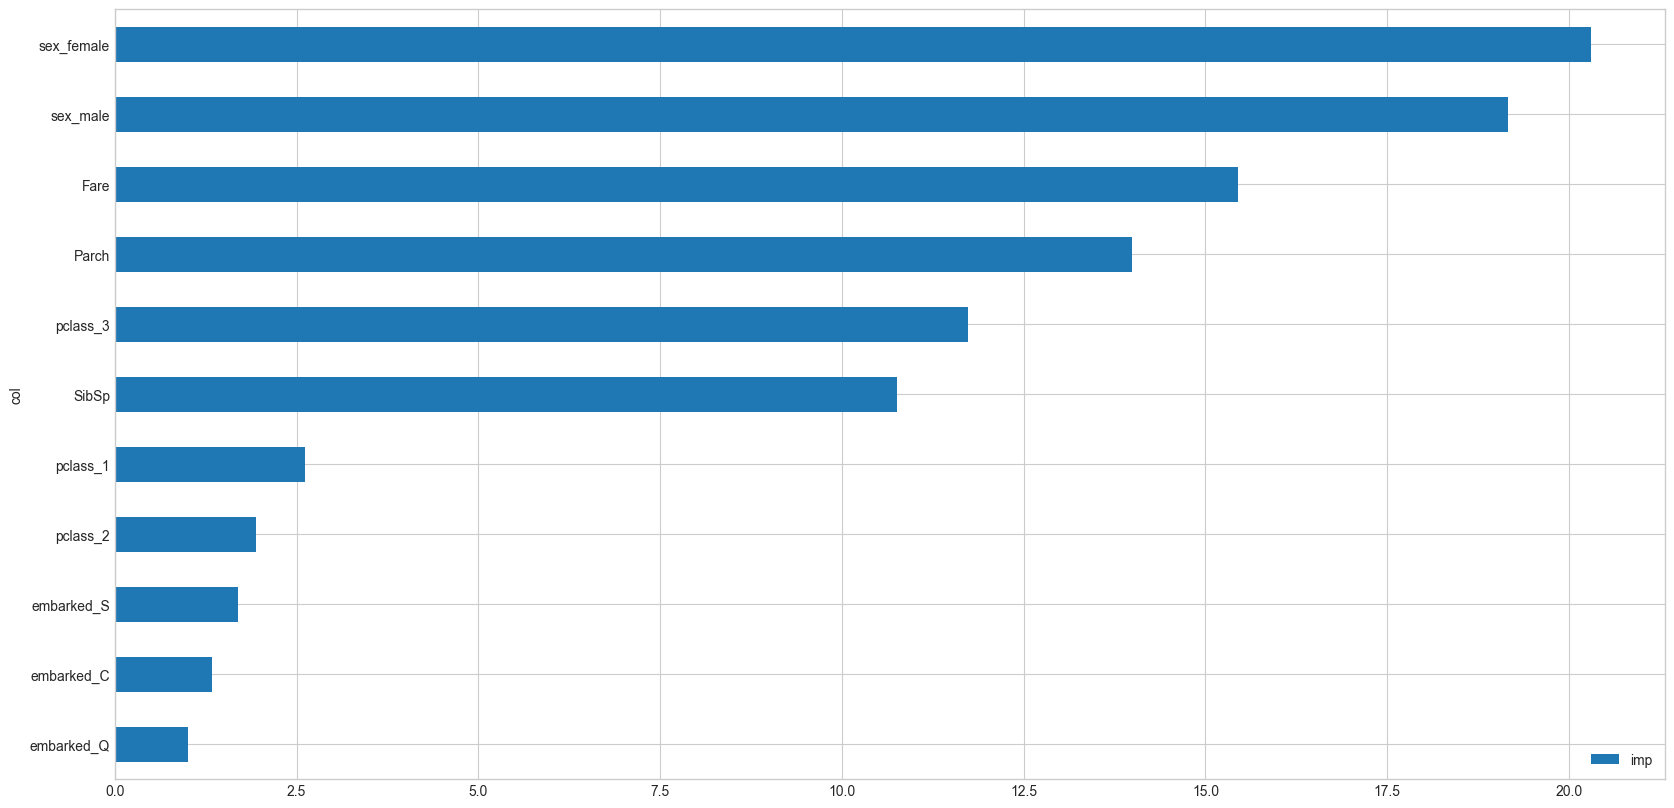

In [47]:
feature_importance(catboost_model, X_train)

## Precision and Recall

In [48]:
metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.8405149751775852
Recall: 0.6770705882352941
F1: 0.7499661732352899
AUC: 0.8859074975891996


## Predictions

In [49]:
# One hot encode the columns in the test data frame (like X_train)
test_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')

test_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')

In [50]:
# Combine the test one hot encoded columns with test
test = pd.concat([test, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_plcass_one_hot], axis=1)

In [51]:
# Make a prediction using the CatBoost model on the wanted columns
predictions = catboost_model.predict(test[X_train.columns])